In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings

warnings.filterwarnings('ignore') # ignore the annoying warnings kaggle gives
# Load data
data = 'archive/b8aeb030-140d-43d2-aa29-1a80862e3d62.csv'
df = pd.read_csv(data, low_memory=False)

In [2]:
df

_id  OBJECTID         * Damage  * Street Number  * Street Name  \
0            1         1        No Damage           8376.0   Quail Canyon   
1            2         2  Affected (1-9%)           8402.0   Quail Canyon   
2            3         3        No Damage           8430.0  Quail Canyon    
3            4         4        No Damage           3838.0    Putah Creek   
4            5         5        No Damage           3830.0    Putah Creek   
...        ...       ...              ...              ...            ...   
100225  100226    101217        No Damage          24198.0           Case   
100226  100227    101218        No Damage          24198.0           Case   
100227  100228    101219        No Damage          24198.0           Case   
100228  100229    101220        No Damage          24008.0         Malibu   
100229  100230    101221        No Damage          24016.0         Malibu   

       * Street Type (e.g. road, drive, lane, etc.)  \
0                                              Road   
1                                              Road   
2                                              Road   
3                                              Road   
4                                              Road   
...                                             ...   
100225                                        Court   
100226                                        Court   
100227                                        Court   
100228                                         Road   
100229                                         Road   

       Street Suffix (e.g. apt. 23, blding C)   * City State  Zip Code  ...  \
0                                         NaN  Winters    CA       NaN  ...   
1                                         NaN  Winters    CA       NaN  ...   
2                                         NaN  Winters    CA       NaN  ...   
3                                         NaN  Winters    CA       NaN  ...   
4                                         NaN  Winters    CA       NaN  ...   
...                                       ...      ...   ...       ...  ...   
100225                               blding A   Malibu    CA   90265.0  ...   
100226                               blding B   Malibu    CA   90265.0  ...   
100227                               blding C   Malibu    CA   90265.0  ...   
100228                                    NaN   Malibu    CA   90265.0  ...   
100229                                    NaN   Malibu    CA   90265.0  ...   

       Fire Name (Secondary) APN (parcel) Assessed Improved Value (parcel)  \
0                      Quail   0101090290                         510000.0   
1                      Quail   0101090270                         573052.0   
2                      Quail   0101090310                         350151.0   
3                      Quail   0103010240                         134880.0   
4                      Quail   0103010220                         346648.0   
...                      ...          ...                              ...   
100225                   NaN   4458018039                        2249521.0   
100226                   NaN   4458018039                        2249521.0   
100227                   NaN   4458018039                        2249521.0   
100228                   NaN   4458009014                        5983875.0   
100229                   NaN   4458009009                         894805.0   

       Year Built (parcel)                    Site Address (parcel)  \
0                   1997.0  8376 QUAIL CANYON RD VACAVILLE CA 95688   
1                   1980.0  8402 QUAIL CANYON RD VACAVILLE CA 95688   
2                   2004.0  8430 QUAIL CANYON RD VACAVILLE CA 95688   
3                   1981.0     3838 PUTAH CREEK RD WINTERS CA 95694   
4                   1980.0     3830 PUTAH CREEK RD WINTERS CA 95694   
...                    ...                                      ...   
100225                 0.0          24198 

In [3]:
# View summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100230 entries, 0 to 100229
Data columns (total 47 columns):
 #   Column                                                        Non-Null Count   Dtype  
---  ------                                                        --------------   -----  
 0   _id                                                           100230 non-null  int64  
 1   OBJECTID                                                      100230 non-null  int64  
 2   * Damage                                                      100230 non-null  object 
 3   * Street Number                                               95810 non-null   float64
 4   * Street Name                                                 94744 non-null   object 
 5   * Street Type (e.g. road, drive, lane, etc.)                  87033 non-null   object 
 6   Street Suffix (e.g. apt. 23, blding C)                        44148 non-null   object 
 7   * City                                                  

Text(0.5, 1.0, 'Numerical columns correlation heatmap')

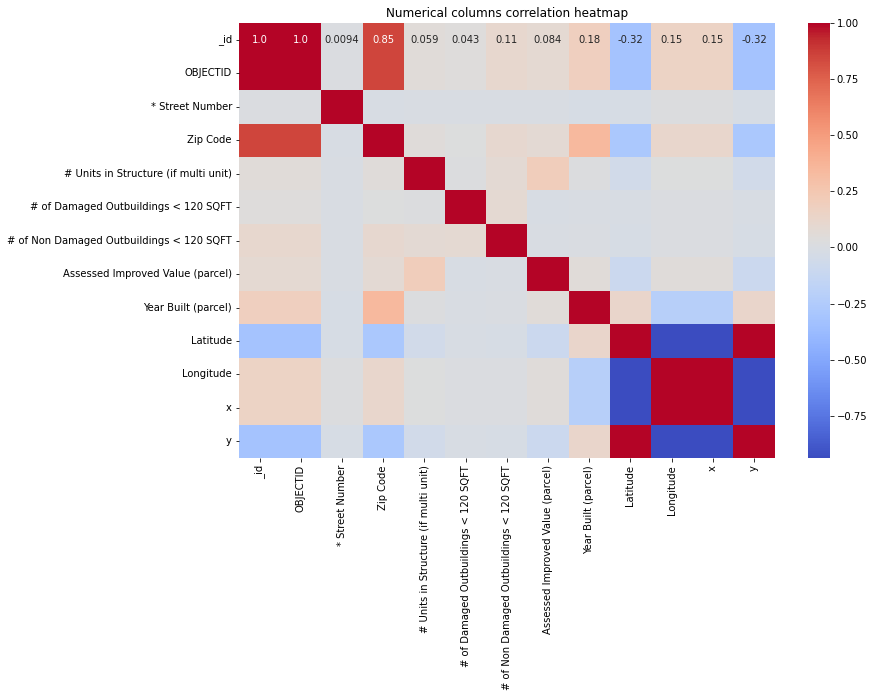

In [4]:
# Select numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64'])

# Drop null values
numeric_cols = numeric_cols.dropna()

# Create corallation matrix
corr_matrix = numeric_cols.corr()

# Visualize with a sns heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm', fmt = '0.2')
plt.title('Numerical columns correlation heatmap')

As expected, unique identifiers have a perfect or very high correlation. A few other interesting relationships stand out:

- There is a STRONG negative correlation between longitude and latitude!
- There is a positive correlation between the number of units in a structure and the value of that property
- There is a correlation between zip code and year built
- There is a correlation between year built and longitude and latitude
- There is a negative correlation between year built and longitude and a positive one between year built and latitude
- There is a correlation between ID of the damage report and longitude, latitude and year buil

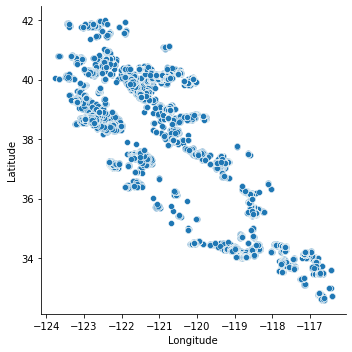

In [5]:
# Plot longitude v latitude
sns.relplot(data = df, x = 'Longitude', y = 'Latitude')

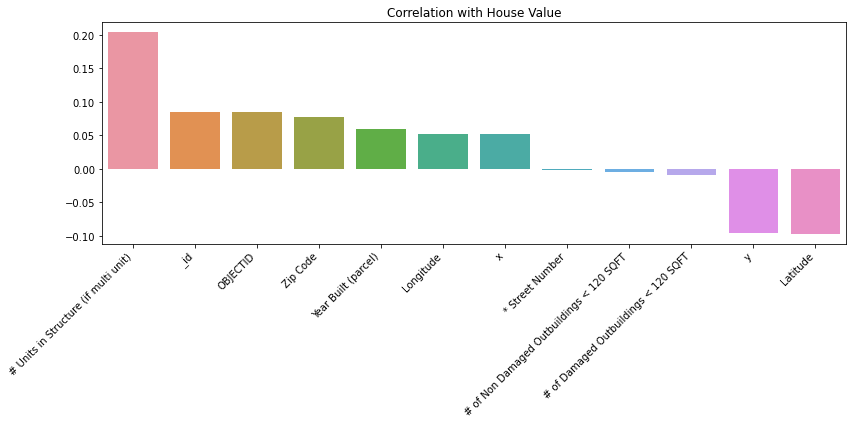

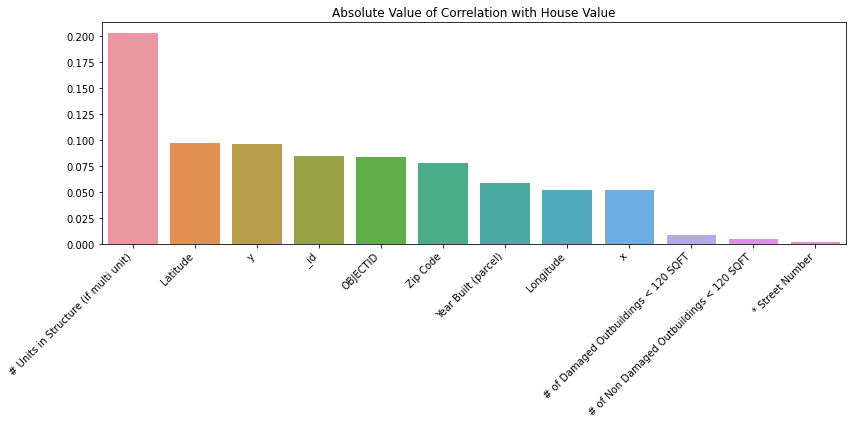

In [6]:
# Remove the correlation with itself (which is always 1)
column_correlations = corr_matrix['Assessed Improved Value (parcel)'].drop('Assessed Improved Value (parcel)')

# Create figure
# Sort correlations in descending order
column_correlations = column_correlations.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=column_correlations.index, y=column_correlations.values)
plt.title(f'Correlation with House Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Create figure with absolute correlation values
plt.figure(figsize=(12, 6))
column_correlations = column_correlations.abs().sort_values(ascending=False)
sns.barplot(x=column_correlations.index, y=column_correlations.values)
plt.title(f'Absolute Value of Correlation with House Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'No Damage'),
  Text(1, 0, 'Affected (1-9%)'),
  Text(2, 0, 'Minor (10-25%)'),
  Text(3, 0, 'Destroyed (>50%)'),
  Text(4, 0, 'Major (26-50%)'),
  Text(5, 0, 'Inaccessible')])

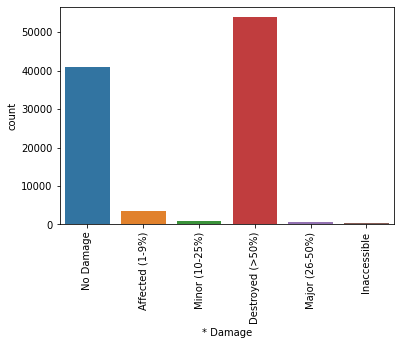

In [7]:
sns.countplot(data = df, x = '* Damage')
plt.xticks(rotation = 90)

In [8]:
df = df[df['* Damage'] != 'Inaccessible']
df['* Damage'] = df['* Damage'].replace(['Minor (10-25%)', 'Major (26-50%)'], 'Affected')
df['* Damage'] = df['* Damage'].replace(['Affected (1-9%)'], 'Affected')
df['* Damage'] = df['* Damage'].replace(['Destroyed (>50%)'], 'Destroyed')

(array([0, 1, 2]),
 [Text(0, 0, 'No Damage'), Text(1, 0, 'Affected'), Text(2, 0, 'Destroyed')])

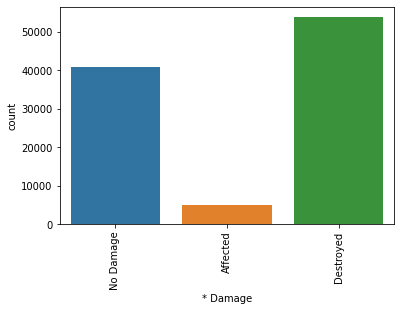

In [9]:
sns.countplot(data = df, x = '* Damage')
plt.xticks(rotation = 90)

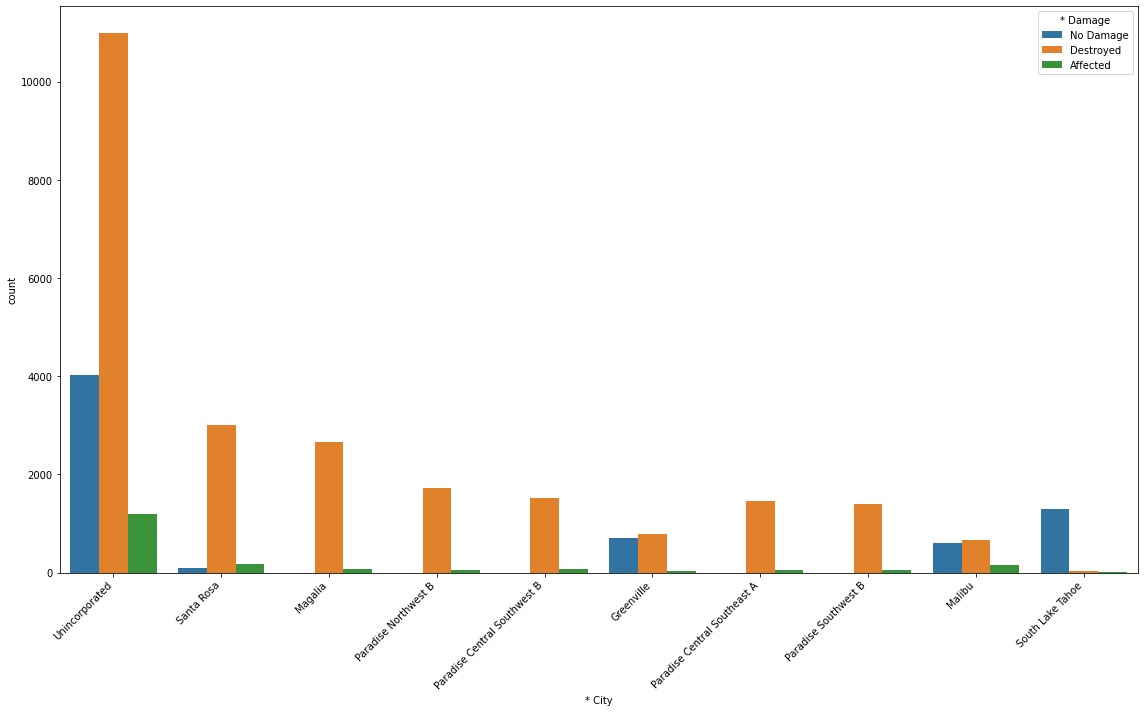

In [10]:
# Get top 10 cities by frequency and sort from most to least
top_cities = df['* City'].value_counts().head(10)

# Create countplot with cities ordered from most to least
plt.figure(figsize=(16, 10))
sns.countplot(data=df[df['* City'].isin(top_cities.index)], 
             x='* City', 
             hue='* Damage', 
             order=top_cities.index)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

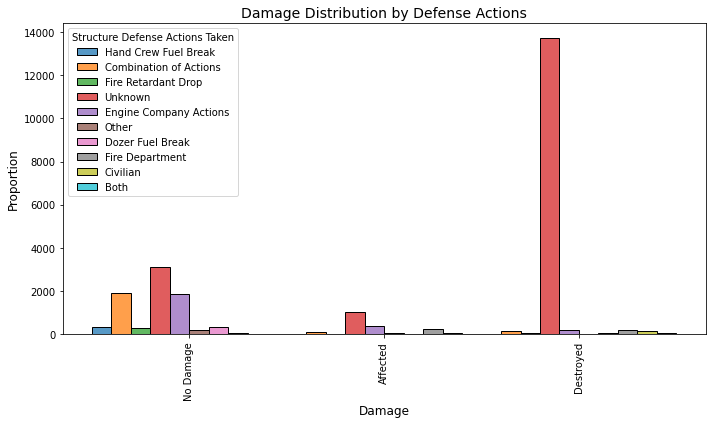

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x ='* Damage', hue ="Structure Defense Actions Taken", multiple="dodge")
plt.title('Damage Distribution by Defense Actions', fontsize=14)
plt.xlabel('Damage', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

From this graph, it is clear that undamaged and affected buildings took a variety of actions, whereas Destroyed buildings overwhelmingly took 'Unknown' (no?) action.

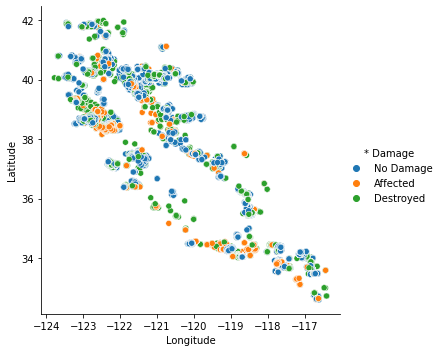

In [12]:
# Plot longitude v latitude, hue = Damage
sns.relplot(data = df, x = 'Longitude', y = 'Latitude', hue = '* Damage')

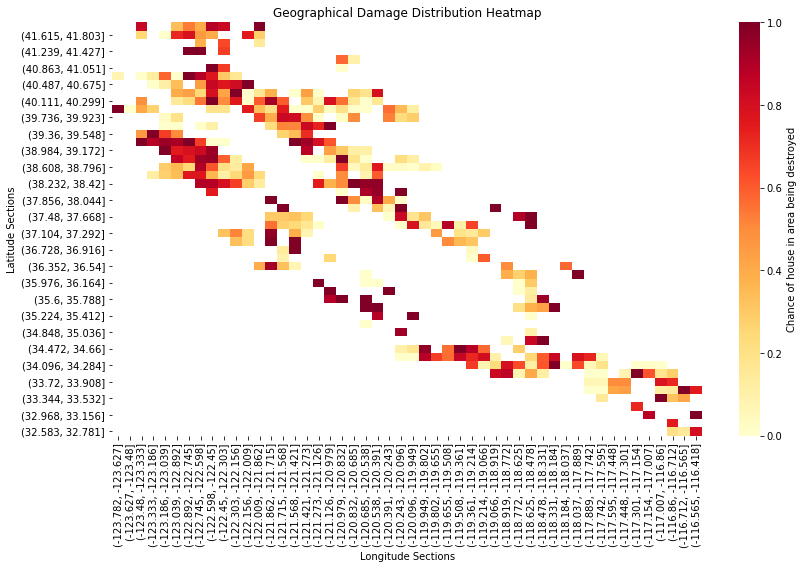

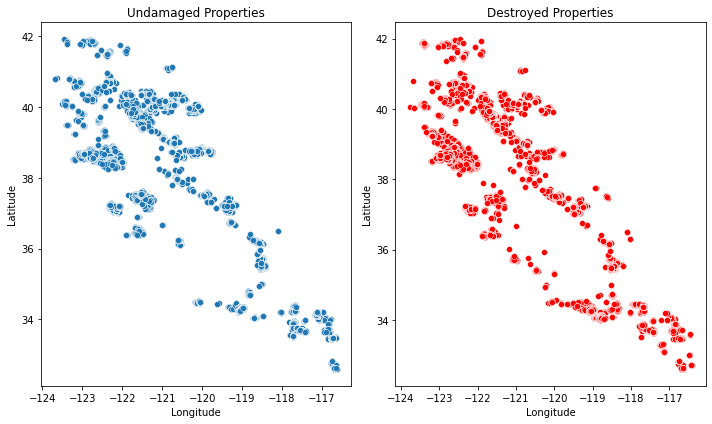

In [13]:
def analyze_damage_distribution(df, num_sections=50):
    """
    Analyze damage distribution across geographical sections
    
    Parameters:
    - df: DataFrame containing damage and location data
    - num_sections: Number of sections to divide longitude and latitude into
    
    Returns:
    - DataFrame with damage ratios for each geographical section
    """
    # Create longitude and latitude bins
    df['long_bin'] = pd.cut(df['Longitude'], bins=num_sections)
    df['lat_bin'] = pd.cut(df['Latitude'], bins=num_sections)
    
    # Group by geographical sections and calculate damage ratio
    damage_distribution = df.groupby(['long_bin', 'lat_bin']).apply(
        lambda x: pd.Series({
            'damage_ratio': len(x[x['* Damage'] == 'Destroyed']) / len(x)
        })
    ).reset_index()
    
    return damage_distribution

def visualize_damage_heatmap(damage_distribution):
    """
    Create a heatmap of damage ratios
    
    Parameters:
    - damage_distribution: DataFrame with damage distribution data
    """
    plt.figure(figsize=(12, 8))
    pivot_data = damage_distribution.pivot(
        index='lat_bin', 
        columns='long_bin', 
        values='damage_ratio'
    )
    
    sns.heatmap(
        pivot_data, 
        cmap='YlOrRd', 
        annot=False, 
        fmt='.2f', 
        cbar_kws={'label': 'Chance of house in area being destroyed'}
    )
    plt.title('Geographical Damage Distribution Heatmap')
    plt.xlabel('Longitude Sections')
    plt.ylabel('Latitude Sections')
    plt.tight_layout()
    plt.gca().invert_yaxis()
    plt.show()

def plot_damage_distributions(df):
    """
    Plot geographical distributions of undamaged and damaged properties
    
    Parameters:
    - df: DataFrame containing damage and location data
    """
    # Undamaged properties
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(
        data=df[df['* Damage'] == 'No Damage'], 
        x='Longitude', 
        y='Latitude'
    )
    plt.title('Undamaged Properties')
    
    # Damaged properties
    plt.subplot(1, 2, 2)
    sns.scatterplot(
        data=df[df['* Damage'] == 'Destroyed'], 
        x='Longitude', 
        y='Latitude', 
        color='red'
    )
    plt.title('Destroyed Properties')
    plt.tight_layout()
    plt.show()

damage_dist = analyze_damage_distribution(df)
visualize_damage_heatmap(damage_dist)
plot_damage_distributions(df)

# Model Training

In [14]:
df = df.drop(['OBJECTID',
              '_id',
              'Street Suffix (e.g. apt. 23, blding C)',
              'State',
              'Zip Code',
              'Community',
              'Battalion',
              'Incident Number (e.g. CAAEU 123456)',
              'Hazard Type',
              'Fire Name (Secondary)',
              'Distance - Residence to Utility/Misc Structure &gt; 120 SQFT',
              'APN (parcel)',
              'Distance - Propane Tank to Structure',
              'GLOBALID',
              'Site Address (parcel)',
              '# Units in Structure (if multi unit)',
              '* Structure Type',
              '* Fence Attached to Structure',
              'x',
              'y',
              '* City',
              '* Incident Name',
              'Incident Start Date',
              'If Affected 1-9% - Where did fire start?',
              'If Affected 1-9% - What started fire?',
              '# of Damaged Outbuildings < 120 SQFT',
              '# of Non Damaged Outbuildings < 120 SQFT'
             ], axis=1)

In [15]:
# Make Structure defense NaNs into 'None'
df['Structure Defense Actions Taken'] = df['Structure Defense Actions Taken'].fillna('None')

# Drop all rows with missing values
df = df.dropna()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58971 entries, 0 to 100229
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   * Damage                                      58971 non-null  object  
 1   * Street Number                               58971 non-null  float64 
 2   * Street Name                                 58971 non-null  object  
 3   * Street Type (e.g. road, drive, lane, etc.)  58971 non-null  object  
 4   * CAL FIRE Unit                               58971 non-null  object  
 5   County                                        58971 non-null  object  
 6   Structure Defense Actions Taken               58971 non-null  object  
 7   Structure Category                            58971 non-null  object  
 8   * Roof Construction                           58971 non-null  object  
 9   * Eaves                                       58971 no

In [17]:
df.head()

* Damage  * Street Number  * Street Name  \
0  No Damage           8376.0   Quail Canyon   
1   Affected           8402.0   Quail Canyon   
2  No Damage           8430.0  Quail Canyon    
3  No Damage           3838.0    Putah Creek   
4  No Damage           3830.0    Putah Creek   

  * Street Type (e.g. road, drive, lane, etc.) * CAL FIRE Unit  County  \
0                                         Road             LNU  Solano   
1                                         Road             LNU  Solano   
2                                         Road             LNU  Solano   
3                                         Road             LNU  Solano   
4                                         Road             LNU  Solano   

  Structure Defense Actions Taken Structure Category * Roof Construction  \
0                            None   Single Residence             Asphalt   
1            Hand Crew Fuel Break   Single Residence             Asphalt   
2                            None   Single Residence             Asphalt   
3                            None   Single Residence             Asphalt   
4                            None   Single Residence                Tile   

      * Eaves  ... * Window Pane * Deck/Porch On Grade * Deck/Porch Elevated  \
0  Unenclosed  ...   Single Pane                  Wood                  Wood   
1  Unenclosed  ...    Multi Pane      Masonry/Concrete         No Deck/Porch   
2    Enclosed  ...   Single Pane         No Deck/Porch         No Deck/Porch   
3  Unenclosed  ...   Single Pane         No Deck/Porch         No Deck/Porch   
4    Enclosed  ...    Multi Pane                  Wood                  Wood   

  * Patio Cover/Carport Attached to Structure  \
0                      No Patio Cover/Carport   
1                      No Patio Cover/Carport   
2                      No Patio Cover/Carport   
3                                 Combustible   
4                                 Combustible   

  Assessed Improved Value (parcel) Year Built (parcel)   Latitude   Longitude  \
0                         510000.0              1997.0  38.474960 -122.044465   
1                         573052.0              1980.0  38.477442 -122.043252   
2                         350151.0              2004.0  38.479358 -122.044585   
3                         134880.0              1981.0  38.487313 -122.015115   
4                         346648.0              1980.0  38.485636 -122.016122   

               long_bin          lat_bin  
0  (-122.156, -122.009]  (38.42, 38.608]  
1  (-122.156, -122.009]  (38.42, 38.608]  
2  (-122.156, -122.009]  (38.42, 38.608]  
3  (-122.156, -122.009]  (38.42, 38.608]  
4  (-122.156, -122.009]  (38.42, 38.608]  

[5 rows x 22 columns]

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Divide into X and y and encode y (label encoder because ordinal)
le = LabelEncoder()
y = le.fit_transform(df['* Damage'])
X = df.drop(['* Damage'], axis=1)

# Divide X data into numerical and catagorical
numerical_col = X.select_dtypes(include = 'float64').columns.tolist()
catagorical_col = X.select_dtypes(exclude = 'float64').columns.tolist()

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

# Create preprocessing steps for numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), catagorical_col)
    ])

# Do preprocessing 
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
# Import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier


# Instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)


# Fit the model

rfc.fit(X_train, y_train)


# Predict the Test set results

y_pred = rfc.predict(X_test)


# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy: 0.9185


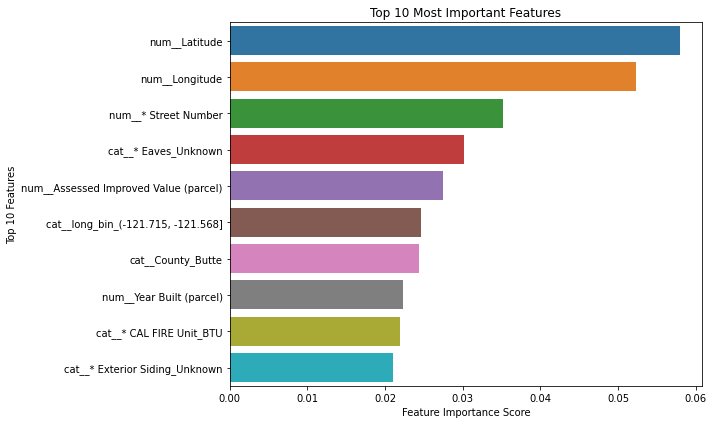

<Figure size 720x576 with 0 Axes>

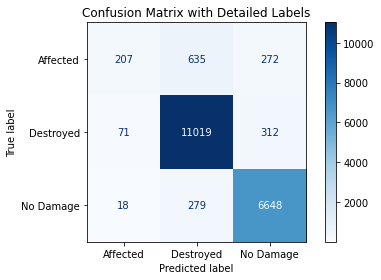

In [20]:
# Get feature names
feature_names = preprocessor.get_feature_names_out()

# Calculate feature scores
feature_scores = pd.Series(rfc.feature_importances_, index=feature_names).sort_values(ascending=False)

# Select top 10 most influential features
top_10_features = feature_scores.head(10)

# Create bar plot for top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_features.values, y=top_10_features.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Top 10 Features')
plt.title("Top 10 Most Important Features")
plt.tight_layout()
plt.show()

# Confusion Matrix with labels
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

class_labels = le.classes_

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
plt.figure(figsize=(10, 8))
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix with Detailed Labels')
plt.tight_layout()
plt.show()

In [21]:
df_sample = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/minoritymajority.csv')
df_sample_r = df_sample[df_sample['STNAME'] == 'California']

values = df_sample_r['TOT_POP'].tolist()
fips = df_sample_r['FIPS'].tolist()

In [22]:
df_sample_r

FIPS      STNAME                 CTYNAME  TOT_POP  TOT_MALE  TOT_FEMALE  \
2605  6001  California          Alameda County  1554720    762520      792200   
2606  6003  California           Alpine County     1129       593         536   
2607  6005  California           Amador County    37035     19898       17137   
2608  6007  California            Butte County   221539    109845      111694   
2609  6009  California        Calaveras County    44742     22383       22359   
2610  6011  California           Colusa County    21411     11046       10365   
2611  6013  California     Contra Costa County  1079597    526925      552672   
2612  6015  California        Del Norte County    28290     15670       12620   
2613  6017  California        El Dorado County   180561     90306       90255   
2615  6019  California           Fresno County   947895    473456      474439   
2616  6021  California            Glenn County    27992     14130       13862   
2617  6023  California         Humboldt County   134827     67538       67289   
2618  6025  California         Imperial County   176948     90891       86057   
2619  6027  California             Inyo County    18495      9293        9202   
2620  6029  California             Kern County   856158    439580      416578   
2621  6031  California            Kings County   151364     84597       66767   
2622  6033  California             Lake County    63983     32109       31874   
2623  6035  California           Lassen County    33658     21635       12023   
2624  6037  California      Los Angeles County  9962789   4914006     5048783   
2625  6039  California           Madera County   152218     74022       78196   
2626  6041  California            Marin County   256069    125372      130697   
2627  6043  California         Mariposa County    17905      9121        8784   
2628  6045  California        Mendocino County    87428     43602       43826   
2629  6047  California           Merced County   262305    132417      129888   
2630  6049  California            Modoc County     9327      4704        4623   
2631  6051  California             Mono County    14348      7729        6619   
2632  6053  California         Monterey County   426762    219443      207319   
2633  6055  California             Napa County   139045     69338       69707   
2634  6057  California           Nevada County    98292     48531       49761   
2635  6059  California           Orange County  3090132   1528718     1561414   
2636  6061  California           Placer County   361682    176673      185009   
2637  6063  California           Plumas County    19399      9708        9691   
2638  6065  California        Riverside County  2268783   1130165     1138618   
2639  6067  California       Sacramento County  1450121    710199      739922   
2640  6069  California       San Benito County    56884     28483       28401   
2641  6071  California   San Bernardino County  2081313   1036274     1045039   
2642  6073  California        San Diego County  3177063   1596752     1580311   
2643  6075  California    San Francisco County   825863    420224      405639   
2644  6077  California      San Joaquin County   702612    349916      352696   
2645  6079  California  San Luis Obispo County   274804    140493      134311   
2646  6081  California        San Mateo County   739311    363870      375441   
2647  6083  California    Santa Barbara County   431249    216752      214497   
2648  6085  California      Santa Clara County  1837504    923522      913982   
2649  6087  California       Santa Cruz County   266776    132819      133957   
2650  6089  California           Shasta County   178586     87619       90967   
2651  6091  California           Sierra County     3086      1549        1537   
2652  6093  California         Siskiyou County    44154     21970       22184   
2653  6095  California           Solano County   420757    209949      210808   
2654  6097  California           Sono

In [23]:
import pandas as pd
home_ins = pd.read_csv('home_insurance_cal.csv', encoding='ANSI')
home_ins

Zip Code       State             City Average Annual Cost  \
0        93407  California  San Luis Obispo           $1,178.00   
1        95419  California      Camp Meeker           $1,222.00   
2        94999  California         Petaluma           $1,229.00   
3        95192  California         San Jose           $1,237.00   
4        95480  California   Stewarts Point           $1,239.00   
...        ...         ...              ...                 ...   
1842     95699  California          Drytown           $1,682.00   
1843     96119  California         Madeline           $1,833.00   
1844     92304  California            Amboy           $1,840.00   
1845     93530  California           Keeler           $1,748.00   
1846     92364  California           Nipton           $1,804.00   

     Percent difference from national average                  County  
0                                     -38.00%  San Luis Obispo County  
1                                     -36.00%           Sonoma County  
2                                     -35.00%           Sonoma County  
3                                     -35.00%      Santa Clara County  
4                                     -35.00%           Sonoma County  
...                                       ...                     ...  
1842                                  -11.00%           Amador County  
1843                                   -3.00%            Modoc County  
1844                                   -3.00%   San Bernardino County  
1845                                   -8.00%             Inyo County  
1846                                   -5.00%   San Bernardino County  

[1847 rows x 6 columns]

In [24]:
home_ins.columns

Index(['Zip Code', 'State', 'City', 'Average Annual Cost',
       'Percent difference from national average', 'County'],
      dtype='object')

In [25]:
# Remove the percent sign and convert to numeric
home_ins['Percent difference from national average'] = home_ins['Percent difference from national average'].replace({'%': ''}, regex=True).astype(float)

# Remove the dollar sign and commas from 'Average Annual Cost' and convert to numeric
home_ins['Average Annual Cost'] = home_ins['Average Annual Cost'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [26]:
home_ins

Zip Code       State             City  Average Annual Cost  \
0        93407  California  San Luis Obispo               1178.0   
1        95419  California      Camp Meeker               1222.0   
2        94999  California         Petaluma               1229.0   
3        95192  California         San Jose               1237.0   
4        95480  California   Stewarts Point               1239.0   
...        ...         ...              ...                  ...   
1842     95699  California          Drytown               1682.0   
1843     96119  California         Madeline               1833.0   
1844     92304  California            Amboy               1840.0   
1845     93530  California           Keeler               1748.0   
1846     92364  California           Nipton               1804.0   

      Percent difference from national average                  County  
0                                        -38.0  San Luis Obispo County  
1                                        -36.0           Sonoma County  
2                                        -35.0           Sonoma County  
3                                        -35.0      Santa Clara County  
4                                        -35.0           Sonoma County  
...                                        ...                     ...  
1842                                     -11.0           Amador County  
1843                                      -3.0            Modoc County  
1844                                      -3.0   San Bernardino County  
1845                                      -8.0             Inyo County  
1846                                      -5.0   San Bernardino County  

[1847 rows x 6 columns]

In [27]:
import pandas as pd

# Group by 'County' and get the mean for 'Average Annual Cost' and 'Percent difference from national average'
home_ins_grouped = home_ins.groupby('County')[['Average Annual Cost', 'Percent difference from national average']].mean()

# Display the grouped dataframe
home_ins_grouped


Average Annual Cost  \
County                                  
Alameda County            1414.754717   
Alpine County             1709.000000   
Amador County             1607.769231   
Butte County              1637.240000   
Calaveras County          1620.090909   
...                               ...   
Tulare County             1479.393939   
Tuolumne County           1562.916667   
Ventura County            1283.280000   
Yolo County               1421.266667   
Yuba County               1572.727273   

                  Percent difference from national average  
County                                                      
Alameda County                                  -25.490566  
Alpine County                                   -10.000000  
Amador County                                   -15.307692  
Butte County                                    -13.720000  
Calaveras County                                -14.590909  
...                                                    ...  
Tulare County                                   -22.121212  
Tuolumne County                                 -17.666667  
Ventura County                                  -32.440000  
Yolo County                                     -25.066667  
Yuba County                                     -17.181818  

[61 rows x 2 columns]

In [28]:
df_sample_r = df_sample_r[['FIPS', 'CTYNAME']]
df_sample_r['County'] = df_sample_r['CTYNAME']
df_sample_r.head()

FIPS           CTYNAME            County
2605  6001    Alameda County    Alameda County
2606  6003     Alpine County     Alpine County
2607  6005     Amador County     Amador County
2608  6007      Butte County      Butte County
2609  6009  Calaveras County  Calaveras County

In [29]:
home_ins_grouped = home_ins_grouped.reset_index()
home_ins_grouped

County  Average Annual Cost  \
0     Alameda County          1414.754717   
1      Alpine County          1709.000000   
2      Amador County          1607.769231   
3       Butte County          1637.240000   
4   Calaveras County          1620.090909   
..               ...                  ...   
56     Tulare County          1479.393939   
57   Tuolumne County          1562.916667   
58    Ventura County          1283.280000   
59       Yolo County          1421.266667   
60       Yuba County          1572.727273   

    Percent difference from national average  
0                                 -25.490566  
1                                 -10.000000  
2                                 -15.307692  
3                                 -13.720000  
4                                 -14.590909  
..                                       ...  
56                                -22.121212  
57                                -17.666667  
58                                -32.440000  
59                                -25.066667  
60                                -17.181818  

[61 rows x 3 columns]

In [30]:
home_insurance_map = pd.merge(home_ins_grouped, df_sample_r, on='County', how='left')
home_insurance_map

County  Average Annual Cost  \
0     Alameda County          1414.754717   
1      Alpine County          1709.000000   
2      Amador County          1607.769231   
3       Butte County          1637.240000   
4   Calaveras County          1620.090909   
..               ...                  ...   
56     Tulare County          1479.393939   
57   Tuolumne County          1562.916667   
58    Ventura County          1283.280000   
59       Yolo County          1421.266667   
60       Yuba County          1572.727273   

    Percent difference from national average    FIPS           CTYNAME  
0                                 -25.490566  6001.0    Alameda County  
1                                 -10.000000  6003.0     Alpine County  
2                                 -15.307692  6005.0     Amador County  
3                                 -13.720000  6007.0      Butte County  
4                                 -14.590909  6009.0  Calaveras County  
..                                       ...     ...               ...  
56                                -22.121212  6107.0     Tulare County  
57                                -17.666667  6109.0   Tuolumne County  
58                                -32.440000  6111.0    Ventura County  
59                                -25.066667  6113.0       Yolo County  
60                                -17.181818  6115.0       Yuba County  

[61 rows x 5 columns]

In [31]:
home_insurance_map = home_insurance_map.dropna(subset=['FIPS'])
home_insurance_map.head()

County  Average Annual Cost  \
0    Alameda County          1414.754717   
1     Alpine County          1709.000000   
2     Amador County          1607.769231   
3      Butte County          1637.240000   
4  Calaveras County          1620.090909   

   Percent difference from national average    FIPS           CTYNAME  
0                                -25.490566  6001.0    Alameda County  
1                                -10.000000  6003.0     Alpine County  
2                                -15.307692  6005.0     Amador County  
3                                -13.720000  6007.0      Butte County  
4                                -14.590909  6009.0  Calaveras County

In [32]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    # Light Yellow
    'rgb(254, 232, 140)',  
    'rgb(254, 178, 76)',   
    'rgb(252, 78, 42)',  
    'rgb(227, 26, 28)', 
    'rgb(189, 0, 38)', 
    'rgb(89, 0, 22)'  
]

# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = home_insurance_map['FIPS']
values = home_insurance_map['Average Annual Cost']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[1300, 1450, 1550, 1650, 1900], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    legend=dict(
      title=dict(
        text='Average Home Insurance Cost by County'
      )
    ),
    title=dict(
      text='California'
    ),
    
)


fig.layout.template = None
fig.show()


In [33]:
import pandas as pd
wildfire_df = pd.read_csv('archive/b8aeb030-140d-43d2-aa29-1a80862e3d62.csv')
wildfire_df.head()

_id  OBJECTID         * Damage  * Street Number  * Street Name  \
0    1         1        No Damage           8376.0   Quail Canyon   
1    2         2  Affected (1-9%)           8402.0   Quail Canyon   
2    3         3        No Damage           8430.0  Quail Canyon    
3    4         4        No Damage           3838.0    Putah Creek   
4    5         5        No Damage           3830.0    Putah Creek   

  * Street Type (e.g. road, drive, lane, etc.)  \
0                                         Road   
1                                         Road   
2                                         Road   
3                                         Road   
4                                         Road   

  Street Suffix (e.g. apt. 23, blding C)   * City State  Zip Code  ...  \
0                                    NaN  Winters    CA       NaN  ...   
1                                    NaN  Winters    CA       NaN  ...   
2                                    NaN  Winters    CA       NaN  ...   
3                                    NaN  Winters    CA       NaN  ...   
4                                    NaN  Winters    CA       NaN  ...   

  Fire Name (Secondary) APN (parcel) Assessed Improved Value (parcel)  \
0                 Quail   0101090290                         510000.0   
1                 Quail   0101090270                         573052.0   
2                 Quail   0101090310                         350151.0   
3                 Quail   0103010240                         134880.0   
4                 Quail   0103010220                         346648.0   

  Year Built (parcel)                    Site Address (parcel)  \
0              1997.0  8376 QUAIL CANYON RD VACAVILLE CA 95688   
1              1980.0  8402 QUAIL CANYON RD VACAVILLE CA 95688   
2              2004.0  8430 QUAIL CANYON RD VACAVILLE CA 95688   
3              1981.0     3838 PUTAH CREEK RD WINTERS CA 95694   
4              1980.0     3830 PUTAH CREEK RD WINTERS CA 95694   

                               GLOBALID   Latitude   Longitude             x  \
0  e1919a06-b4c6-476d-99e5-f0b45b070de8  38.474960 -122.044465 -1.358593e+07   
1  b090eeb6-5b18-421e-9723-af7c9144587c  38.477442 -122.043252 -1.358579e+07   
2  268da70b-753f-46aa-8fb1-327099337395  38.479358 -122.044585 -1.358594e+07   
3  64d4a278-5ee9-414a-8bf4-247c5b5c60f9  38.487313 -122.015115 -1.358266e+07   
4  1b44b214-01fd-4f06-b764-eb42a1ec93d7  38.485636 -122.016122 -1.358277e+07   

              y  
0  4.646741e+06  
1  4.647094e+06  
2  4.647366e+06  
3  4.648497e+06  
4  4.648259e+06  

[5 rows x 47 columns]

In [34]:
wildfire_df = wildfire_df[['OBJECTID', '* Damage', '* Street Name', '* City', 'State', 'Latitude', 'Longitude']]
wildfire_df

OBJECTID         * Damage  * Street Name   * City State   Latitude  \
0              1        No Damage   Quail Canyon  Winters    CA  38.474960   
1              2  Affected (1-9%)   Quail Canyon  Winters    CA  38.477442   
2              3        No Damage  Quail Canyon   Winters    CA  38.479358   
3              4        No Damage    Putah Creek  Winters    CA  38.487313   
4              5        No Damage    Putah Creek  Winters    CA  38.485636   
...          ...              ...            ...      ...   ...        ...   
100225    101217        No Damage           Case   Malibu    CA  34.033408   
100226    101218        No Damage           Case   Malibu    CA  34.033278   
100227    101219        No Damage           Case   Malibu    CA  34.033618   
100228    101220        No Damage         Malibu   Malibu    CA  34.032085   
100229    101221        No Damage         Malibu   Malibu    CA  34.031957   

         Longitude  
0      -122.044465  
1      -122.043252  
2      -122.044585  
3      -122.015115  
4      -122.016122  
...            ...  
100225 -118.700625  
100226 -118.700902  
100227 -118.701102  
100228 -118.698270  
100229 -118.698497  

[100230 rows x 7 columns]

In [35]:
values_to_extract = [
    'Affected (1-9%)', 
    'Minor (10-25%)', 
    'Destroyed (>50%)', 
    'Major (26-50%)', 
    'Inaccessible'
]

wildfire_df = wildfire_df[wildfire_df['* Damage'].isin(values_to_extract)]

In [36]:
import plotly.graph_objects as go
import pandas as pd

# Assuming wildfire_df is your DataFrame
# Define the mapping of damage levels to specific colors
damage_mapping = {
    'Affected (1-9%)': 1,
    'Minor (10-25%)': 2,
    'Destroyed (>50%)': 3,
    'Major (26-50%)': 4,
    'Inaccessible': 5
}

# Map the 'Damage' values to corresponding numeric values
wildfire_df['damage_numeric'] = wildfire_df['* Damage'].map(damage_mapping)

# Define a discrete color list corresponding to the damage levels
color_map = {
    1: 'green',         # 'Affected (1-9%)' is green
    2: 'yellow',        # 'Minor (10-25%)' is yellow
    3: 'red',           # 'Destroyed (>50%)' is red
    4: 'orange',        # 'Major (26-50%)' is orange
    5: 'gray'           # 'Inaccessible' is gray
}

# Map each numeric value to its color
wildfire_df['color'] = wildfire_df['damage_numeric'].map(color_map)

fig = go.Figure(data=go.Scattergeo(
        lon = wildfire_df['Longitude'],
        lat = wildfire_df['Latitude'],
        text = wildfire_df['* Street Name'],
        mode = 'markers',
        marker=dict(
            color=wildfire_df['color'],  # Use the mapped 'color' column for coloring
            colorscale='Viridis',  # Colorscale doesn't matter, as we're using custom colors
            showscale=False  # Disable the colorbar since we are using discrete colors
        )
    ))

# Update layout for bigger size and smaller borders
fig.update_layout(
        title = 'Wildfire Damage Locations<br>(Hover for street names)',
        geo_scope='usa',
        geo = dict(
            projection=dict(
                type='albers usa'
            ),
            center=dict(
                lat=36.7783,  # Latitude for California
                lon=-119.4179  # Longitude for California
            ),
            scope='usa',
            lonaxis=dict(
                range=[-127, -109]  # Further zoomed-in range for longitude
            ),
            lataxis=dict(
                range=[34, 44]  # Further zoomed-in range for latitude
            )
        ),
        width=1000,  # Set the width of the map (increase this value for a larger map)
        height=800,  # Set the height of the map (increase this value for a larger map)
        margin=dict(
            l=0,  # Left margin (border)
            r=0,  # Right margin (border)
            t=30,  # Top margin (border)
            b=0   # Bottom margin (border)
        )
    )

fig.show()


In [37]:
city_count_lookup = home_ins[['City', 'County']]
city_count_lookup

City                  County
0     San Luis Obispo  San Luis Obispo County
1         Camp Meeker           Sonoma County
2            Petaluma           Sonoma County
3            San Jose      Santa Clara County
4      Stewarts Point           Sonoma County
...               ...                     ...
1842          Drytown           Amador County
1843         Madeline            Modoc County
1844            Amboy   San Bernardino County
1845           Keeler             Inyo County
1846           Nipton   San Bernardino County

[1847 rows x 2 columns]

In [38]:
wildfire_df['City'] = wildfire_df['* City']
wildfire_df

OBJECTID          * Damage          * Street Name   * City State  \
1              2   Affected (1-9%)           Quail Canyon  Winters    CA   
6              7    Minor (10-25%)            Putah Creek  Winters    CA   
7              8    Minor (10-25%)            Putah Creek  Winters    CA   
8              9  Destroyed (>50%)           Putah creek   Winters    CA   
10            11    Minor (10-25%)            Putah Creek  Winters    CA   
...          ...               ...                    ...      ...   ...   
100146    101138      Inaccessible                Malibu    Malibu    CA   
100147    101139      Inaccessible                Malibu    Malibu    CA   
100168    101160      Inaccessible  Pacific Coast Highway   Malibu    CA   
100199    101191    Minor (10-25%)                 Malibu   Malibu    CA   
100207    101199  Destroyed (>50%)                 Malibu   Malibu    CA   

         Latitude   Longitude  damage_numeric   color     City  
1       38.477442 -122.043252               1   green  Winters  
6       38.484872 -122.017761               2  yellow  Winters  
7       38.484294 -122.018419               2  yellow  Winters  
8       38.483481 -122.018955               3     red  Winters  
10      38.480408 -122.021296               2  yellow  Winters  
...           ...         ...             ...     ...      ...  
100146  34.033944 -118.697101               5    gray   Malibu  
100147  34.034345 -118.697360               5    gray   Malibu  
100168  34.033512 -118.723703               5    gray   Malibu  
100199  34.032513 -118.700346               2  yellow   Malibu  
100207  34.032285 -118.700625               3     red   Malibu  

[59335 rows x 10 columns]

In [39]:
wildfire_df = pd.merge(wildfire_df, city_count_lookup, on='City')
wildfire_df

OBJECTID          * Damage       * Street Name     * City State  \
0             2   Affected (1-9%)        Quail Canyon    Winters    CA   
1             7    Minor (10-25%)         Putah Creek    Winters    CA   
2             8    Minor (10-25%)         Putah Creek    Winters    CA   
3             9  Destroyed (>50%)        Putah creek     Winters    CA   
4            11    Minor (10-25%)         Putah Creek    Winters    CA   
...         ...               ...                 ...        ...   ...   
53416     99280   Affected (1-9%)  Horseshoe Meadows   Lone Pine    CA   
53417     99282  Destroyed (>50%)  Horseshoe Meadows   Lone Pine    CA   
53418     99283  Destroyed (>50%)  Horseshoe Meadows   Lone Pine    CA   
53419     99284   Affected (1-9%)  Horseshoe Meadows   Lone Pine    CA   
53420     99285  Destroyed (>50%)  Horseshoe Meadows   Lone Pine    CA   

        Latitude   Longitude  damage_numeric   color       City  \
0      38.477442 -122.043252               1   green    Winters   
1      38.484872 -122.017761               2  yellow    Winters   
2      38.484294 -122.018419               2  yellow    Winters   
3      38.483481 -122.018955               3     red    Winters   
4      38.480408 -122.021296               2  yellow    Winters   
...          ...         ...             ...     ...        ...   
53416  36.505309 -118.101310               1   green  Lone Pine   
53417  36.504870 -118.103042               3     red  Lone Pine   
53418  36.504811 -118.102957               3     red  Lone Pine   
53419  36.504502 -118.103072               1   green  Lone Pine   
53420  36.504709 -118.102850               3     red  Lone Pine   

                County  
0          Yolo County  
1          Yolo County  
2          Yolo County  
3          Yolo County  
4          Yolo County  
...                ...  
53416  Humboldt County  
53417  Humboldt County  
53418  Humboldt County  
53419  Humboldt County  
53420  Humboldt County  

[53421 rows x 11 columns]

In [40]:
wildfire_df = pd.merge(wildfire_df, home_insurance_map, on='County')
wildfire_df

OBJECTID          * Damage       * Street Name     * City State  \
0             2   Affected (1-9%)        Quail Canyon    Winters    CA   
1             7    Minor (10-25%)         Putah Creek    Winters    CA   
2             8    Minor (10-25%)         Putah Creek    Winters    CA   
3             9  Destroyed (>50%)        Putah creek     Winters    CA   
4            11    Minor (10-25%)         Putah Creek    Winters    CA   
...         ...               ...                 ...        ...   ...   
53416     99280   Affected (1-9%)  Horseshoe Meadows   Lone Pine    CA   
53417     99282  Destroyed (>50%)  Horseshoe Meadows   Lone Pine    CA   
53418     99283  Destroyed (>50%)  Horseshoe Meadows   Lone Pine    CA   
53419     99284   Affected (1-9%)  Horseshoe Meadows   Lone Pine    CA   
53420     99285  Destroyed (>50%)  Horseshoe Meadows   Lone Pine    CA   

        Latitude   Longitude  damage_numeric   color       City  \
0      38.477442 -122.043252               1   green    Winters   
1      38.484872 -122.017761               2  yellow    Winters   
2      38.484294 -122.018419               2  yellow    Winters   
3      38.483481 -122.018955               3     red    Winters   
4      38.480408 -122.021296               2  yellow    Winters   
...          ...         ...             ...     ...        ...   
53416  36.505309 -118.101310               1   green  Lone Pine   
53417  36.504870 -118.103042               3     red  Lone Pine   
53418  36.504811 -118.102957               3     red  Lone Pine   
53419  36.504502 -118.103072               1   green  Lone Pine   
53420  36.504709 -118.102850               3     red  Lone Pine   

                County  Average Annual Cost  \
0          Yolo County          1421.266667   
1          Yolo County          1421.266667   
2          Yolo County          1421.266667   
3          Yolo County          1421.266667   
4          Yolo County          1421.266667   
...                ...                  ...   
53416  Humboldt County          1475.285714   
53417  Humboldt County          1475.285714   
53418  Humboldt County          1475.285714   
53419  Humboldt County          1475.285714   
53420  Humboldt County          1475.285714   

       Percent difference from national average    FIPS          CTYNAME  
0                                    -25.066667  6113.0      Yolo County  
1                                    -25.066667  6113.0      Yolo County  
2                                    -25.066667  6113.0      Yolo County  
3                                    -25.066667  6113.0      Yolo County  
4                                    -25.066667  6113.0      Yolo County  
...                                         ...     ...              ...  
53416                                -22.285714  6023.0  Humboldt County  
53417                                -22.285714  6023.0  Humboldt County  
53418                                -22.285714  6023.0  Humboldt County  
53419                                -22.285714  6023.0  Humboldt County  
53420                                -22.285714  6023.0  Humboldt County  

[53421 rows x 15 columns]

In [41]:
wildfire_df_group = wildfire_df.groupby('County')['* Damage'].value_counts().reset_index(name='Count')
wildfire_df_group


County          * Damage  Count
0    Alameda County  Destroyed (>50%)     10
1    Alameda County    Minor (10-25%)      2
2     Alpine County  Destroyed (>50%)      4
3     Alpine County      Inaccessible      1
4     Amador County  Destroyed (>50%)      6
..              ...               ...    ...
174     Yolo County  Destroyed (>50%)      7
175     Yolo County    Minor (10-25%)      3
176     Yuba County  Destroyed (>50%)     24
177     Yuba County   Affected (1-9%)      3
178     Yuba County    Minor (10-25%)      2

[179 rows x 3 columns]

In [42]:
damage_pivot = wildfire_df.groupby(['County', '* Damage']).size().unstack(fill_value=0)
damage_pivot.reset_index(inplace=True)

damage_pivot = pd.merge(damage_pivot, home_insurance_map, on='County')
damage_pivot.head()


County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0    Alameda County                0                10             0   
1     Alpine County                0                 4             1   
2     Amador County                2                 6             0   
3      Butte County              125              3231             2   
4  Calaveras County               11               340             1   

   Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0               0               2          1414.754717   
1               0               0          1709.000000   
2               0               0          1607.769231   
3              16              17          1637.240000   
4               1               4          1620.090909   

   Percent difference from national average    FIPS           CTYNAME  
0                                -25.490566  6001.0    Alameda County  
1                                -10.000000  6003.0     Alpine County  
2                                -15.307692  6005.0     Amador County  
3                                -13.720000  6007.0      Butte County  
4                                -14.590909  6009.0  Calaveras County

In [43]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    'rgb(255, 255, 178)',  # Light Yellow
    'rgb(254, 232, 140)',  # Soft Yellow
    'rgb(254, 217, 118)',  # Yellow-Orange
    'rgb(254, 178, 76)',   # Orange-Yellow
    'rgb(253, 141, 60)',   # Light Orange
    'rgb(252, 78, 42)',    # Orange-Red
    'rgb(227, 26, 28)',    # Red
    'rgb(189, 0, 38)',     # Dark Red
    'rgb(128, 0, 38)',     # Deep Red
    'rgb(89, 0, 22)'       # Very Dark Red
]


# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = damage_pivot['FIPS']
values = damage_pivot['Destroyed (>50%)']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[10, 100, 250, 500, 750, 950, 1200, 1500, 2000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    centroid_marker={'opacity': 0}, show_hover=True,
    show_state_data = True,
    legend=dict(
      title=dict(
        text='Severe Property Damage By CA County'
      )
    ),
    title=dict(
      text='California'
    ),
    
)


fig.layout.template = None
fig.show()

In [44]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    'rgb(255, 255, 178)',  # Light Yellow

    'rgb(254, 217, 118)',  # Yellow-Orange

    'rgb(253, 141, 60)',   # Light Orange
    'rgb(252, 78, 42)',    # Orange-Red

    'rgb(189, 0, 38)',     # Dark Red

    'rgb(89, 0, 22)'       # Very Dark Red
]


# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = damage_pivot['FIPS']
values = damage_pivot['Major (26-50%)']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[10, 30, 50, 80, 110], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    centroid_marker={'opacity': 0}, show_hover=True,
    show_state_data = True,
    legend=dict(
      title=dict(
        text='Major Property Damage By CA County'
      )
    ),
    title=dict(
      text='California'
    ),
    
)


fig.layout.template = None
fig.show()

In [45]:
income = pd.read_csv('median_income.csv')
income.head()

County  FIPS Value (Dollars) Rank within US (of 3142 counties)
0   Trinity County  6105          47,317                             2,704
1  Imperial County  6025          53,847                             2,245
2  Siskiyou County  6093          53,898                             2,243
3     Modoc County  6049          54,962                             2,161
4      Lake County  6033          56,259                             2,035

In [46]:
damage_pivot = pd.merge(damage_pivot, income, on=['County', 'FIPS'])


In [47]:
damage_pivot['Median_Income'] = damage_pivot['Value (Dollars)']

In [48]:
damage_pivot["Value (Dollars)"] = damage_pivot["Value (Dollars)"].str.replace(",", "").astype(int)
damage_pivot.head()

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0    Alameda County                0                10             0   
1     Alpine County                0                 4             1   
2     Amador County                2                 6             0   
3      Butte County              125              3231             2   
4  Calaveras County               11               340             1   

   Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0               0               2          1414.754717   
1               0               0          1709.000000   
2               0               0          1607.769231   
3              16              17          1637.240000   
4               1               4          1620.090909   

   Percent difference from national average    FIPS           CTYNAME  \
0                                -25.490566  6001.0    Alameda County   
1                                -10.000000  6003.0     Alpine County   
2                                -15.307692  6005.0     Amador County   
3                                -13.720000  6007.0      Butte County   
4                                -14.590909  6009.0  Calaveras County   

   Value (Dollars) Rank within US (of 3142 counties) Median_Income  
0           122488                                29       122,488  
1           101125                               107       101,125  
2            74853                               587        74,853  
3            66085                             1,130        66,085  
4            77526                               485        77,526

In [49]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    'rgb(255, 255, 178)',  # Light Yellow

    'rgb(254, 217, 118)',  # Yellow-Orange

    'rgb(253, 141, 60)',   # Light Orange
    'rgb(252, 78, 42)',    # Orange-Red

    'rgb(189, 0, 38)',     # Dark Red

    'rgb(89, 0, 22)'       # Very Dark Red
]


# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = damage_pivot['FIPS']
values = damage_pivot['Value (Dollars)']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[20000, 50000, 90000, 120000, 150000], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    centroid_marker={'opacity': 0}, show_hover=True,
    show_state_data = True,
    legend=dict(
      title=dict(
        text='Median Income by CA County'
      )
    ),
    title=dict(
      text='California'
    ),
    
)


fig.layout.template = None
fig.show()

In [50]:
pop_df = pd.read_csv('pop.csv')
pop_df

County  Year  Annual   Median Income  Population
0         Trinity County  2022  Annual         $36,314      15,927
1          Lassen County  2022  Annual         $40,700      29,544
2           Kings County  2022  Annual         $42,525     151,954
3       Del Norte County  2022  Annual         $43,677      26,738
4            Kern County  2022  Annual         $44,862     908,708
..                   ...   ...     ...             ...         ...
113    San Diego County   2022  Annual    $243,506,541   3,293,911
114       Orange County   2022  Annual    $263,290,135   3,154,042
115  Santa Clara County   2022  Annual    $270,162,197   1,903,274
116  Los Angeles County   2022  Annual    $720,740,528   9,840,925
117          California   2022  Annual  $3,006,647,281  39,146,273

[118 rows x 5 columns]

In [51]:
pop_df['County'] = pop_df['County'].str.strip()
pop_df['County'].unique()

array(['Trinity County', 'Lassen County', 'Kings County',
       'Del Norte County', 'Kern County', 'Imperial County',
       'Lake County', 'Merced County', 'Madera County', 'Tulare County',
       'Tehama County', 'Sierra County', 'Yuba County', 'Amador County',
       'San Bernardino County', 'Fresno County', 'Stanislaus County',
       'Glenn County', 'Riverside County', 'Siskiyou County',
       'Sutter County', 'Tuolumne County', 'Humboldt County',
       'Shasta County', 'San Joaquin County', 'Butte County',
       'Colusa County', 'Calaveras County', 'Modoc County',
       'Mendocino County', 'Solano County', 'Plumas County',
       'Mariposa County', 'Inyo County', 'Sacramento County',
       'San Benito County', 'Yolo County', 'Monterey County',
       'Mono County', 'Alpine County', 'San Luis Obispo County',
       'Nevada County', 'Los Angeles County', 'San Diego County',
       'Santa Barbara County', 'Ventura County', 'California',
       'Sonoma County', 'Placer County',

In [52]:
damage_pivot = pd.merge(damage_pivot, pop_df, on='County')
damage_pivot

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0   Alameda County                0                10             0   
1   Alameda County                0                10             0   
2    Alpine County                0                 4             1   
3    Alpine County                0                 4             1   
4    Amador County                2                 6             0   
..             ...              ...               ...           ...   
95  Ventura County              176               555            18   
96     Yolo County                8                 7             0   
97     Yolo County                8                 7             0   
98     Yuba County                3                24             0   
99     Yuba County                3                24             0   

    Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0                0               2          1414.754717   
1                0               2          1414.754717   
2                0               0          1709.000000   
3                0               0          1709.000000   
4                0               0          1607.769231   
..             ...             ...                  ...   
95              36              62          1283.280000   
96               0               3          1421.266667   
97               0               3          1421.266667   
98               0               2          1572.727273   
99               0               2          1572.727273   

    Percent difference from national average    FIPS         CTYNAME  \
0                                 -25.490566  6001.0  Alameda County   
1                                 -25.490566  6001.0  Alameda County   
2                                 -10.000000  6003.0   Alpine County   
3                                 -10.000000  6003.0   Alpine County   
4                                 -15.307692  6005.0   Amador County   
..                                       ...     ...             ...   
95                                -32.440000  6111.0  Ventura County   
96                                -25.066667  6113.0     Yolo County   
97                                -25.066667  6113.0     Yolo County   
98                                -17.181818  6115.0     Yuba County   
99                                -17.181818  6115.0     Yuba County   

    Value (Dollars) Rank within US (of 3142 counties) Median_Income  Year  \
0            122488                                29       122,488  2022   
1            122488                                29       122,488  2022   
2            101125                               107       101,125  2022   
3            101125                               107       101,125  2022   
4             74853                               587        74,853  2022   
..              ...                               ...           ...   ...   
95           102141                               102       102,141  2022   
96            85097                               274        85,097  2022   
97            85097                               274        85,097  2022   
98            66693                             1,065        66,693  2022   
99            66693                             1,065        66,693  2022   

    Annual Median Income Population  
0   Annual       $97,754  1,649,975  
1   Annual  $159,241,119  1,649,975  
2   Annual       $67,551      1,175  
3   Annual       $80,386      1,175  
4   Annual       $48,463     40,105  
..     ...           ...        ...  
95  Annual   $63,589,878    830,434  
96  Annual       $64,279    221,342  
97  Annual   $14,277,264    221,342  
98  Annual       $48,204     82,667  
99  Annual    $4,064,114     82,667  

[100 rows x 17 columns]

In [53]:
damage_pivot['Population'] = damage_pivot['Population'].astype(str).str.replace(',', '').astype(int)
damage_pivot.head()

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0  Alameda County                0                10             0   
1  Alameda County                0                10             0   
2   Alpine County                0                 4             1   
3   Alpine County                0                 4             1   
4   Amador County                2                 6             0   

   Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0               0               2          1414.754717   
1               0               2          1414.754717   
2               0               0          1709.000000   
3               0               0          1709.000000   
4               0               0          1607.769231   

   Percent difference from national average    FIPS         CTYNAME  \
0                                -25.490566  6001.0  Alameda County   
1                                -25.490566  6001.0  Alameda County   
2                                -10.000000  6003.0   Alpine County   
3                                -10.000000  6003.0   Alpine County   
4                                -15.307692  6005.0   Amador County   

   Value (Dollars) Rank within US (of 3142 counties) Median_Income  Year  \
0           122488                                29       122,488  2022   
1           122488                                29       122,488  2022   
2           101125                               107       101,125  2022   
3           101125                               107       101,125  2022   
4            74853                               587        74,853  2022   

   Annual Median Income  Population  
0  Annual       $97,754     1649975  
1  Annual  $159,241,119     1649975  
2  Annual       $67,551        1175  
3  Annual       $80,386        1175  
4  Annual       $48,463       40105

In [54]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    'rgb(173, 216, 230)',
    'rgb(100, 149, 237)',
    'rgb(0, 0, 139)',
    'rgb(255, 255, 178)',  # Light Yellow
    'rgb(254, 217, 118)',  # Yellow-Orange
    'rgb(253, 141, 60)',   # Light Orange
    'rgb(252, 78, 42)',    # Orange-Red
    'rgb(189, 0, 38)',     # Dark Red
    'rgb(89, 0, 22)'       # Very Dark Red
]


# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = damage_pivot['FIPS']
values = damage_pivot['Population']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[1000, 10000, 50000, 100000, 150000, 450000, 900000, 15000000 ], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    centroid_marker={'opacity': 0}, show_hover=True,
    show_state_data = True,
    legend=dict(
      title=dict(
        text='Population Brackets'
      )
    ),
    title=dict(
      text='Population by County in California'
    ),
    
)


fig.layout.template = None
fig.show()


In [55]:
damage_distress = damage_pivot.sort_values(by=['Average Annual Cost', 'Value (Dollars)', 'Population', 'Destroyed (>50%)', 'Major (26-50%)' ], 
                    ascending=[False, True, False, False, False])

damage_distress.head(10)

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
32  Los Angeles County             6705              7221           513   
33  Los Angeles County             6705              7221           513   
88      Trinity County                4               152             1   
89      Trinity County                4               152             1   
76       Shasta County              119              1704            10   
77       Shasta County              119              1704            10   
30       Lassen County               13               151             6   
31       Lassen County               13               151             6   
52       Plumas County               25               219             2   
53       Plumas County               25               219             2   

    Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
32             969            2573          1857.231511   
33             969            2573          1857.231511   
88               1               5          1775.500000   
89               1               5          1775.500000   
76              24              27          1771.923077   
77              24              27          1771.923077   
30               3               5          1752.272727   
31               3               5          1752.272727   
52               3               5          1743.375000   
53               3               5          1743.375000   

    Percent difference from national average    FIPS             CTYNAME  \
32                                 -2.189711  6037.0  Los Angeles County   
33                                 -2.189711  6037.0  Los Angeles County   
88                                 -6.500000  6105.0      Trinity County   
89                                 -6.500000  6105.0      Trinity County   
76                                 -6.769231  6089.0       Shasta County   
77                                 -6.769231  6089.0       Shasta County   
30                                 -7.727273  6035.0       Lassen County   
31                                 -7.727273  6035.0       Lassen County   
52                                 -8.125000  6063.0       Plumas County   
53                                 -8.125000  6063.0       Plumas County   

    Value (Dollars) Rank within US (of 3142 counties) Median_Income  Year  \
32            83411                               314        83,411  2022   
33            83411                               314        83,411  2022   
88            47317                             2,704        47,317  2022   
89            47317                             2,704        47,317  2022   
76            68347                               944        68,347  2022   
77            68347                               944        68,347  2022   
30            59515                             1,704        59,515  2022   
31            59515                             1,704        59,515  2022   
52            67885                               983        67,885  2022   
53            67885                               983        67,885  2022   

    Annual Median Income  Population  
32  Annual       $74,142     9840925  
33  Annual  $720,740,528     9840925  
88  Annual       $36,314       15927  
89  Annual      $573,075       15927  
76  Annual       $54,120      179786  
77  Annual    $9,791,945      179786  
30  Annual       $40,700       29544  
31  Annual    $1,217,102       29544  
52  Annual       $59,387       19280  
53  Annual    $1,149,201       19280

In [56]:
hist_fire = pd.read_csv('2013-202/California_Fire_Incidents.csv')


hist_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AcresBurned           1633 non-null   float64
 1   Active                1636 non-null   bool   
 2   AdminUnit             1636 non-null   object 
 3   AirTankers            28 non-null     float64
 4   ArchiveYear           1636 non-null   int64  
 5   CalFireIncident       1636 non-null   bool   
 6   CanonicalUrl          1636 non-null   object 
 7   ConditionStatement    284 non-null    object 
 8   ControlStatement      105 non-null    object 
 9   Counties              1636 non-null   object 
 10  CountyIds             1636 non-null   object 
 11  CrewsInvolved         171 non-null    float64
 12  Dozers                123 non-null    float64
 13  Engines               191 non-null    float64
 14  Extinguished          1577 non-null   object 
 15  Fatalities           

In [57]:
hist_fire = hist_fire[hist_fire['MajorIncident'] == True]
hist_fire.head()

AcresBurned  Active                                          AdminUnit  \
4       24251.0   False                       Ventura County Fire/CAL FIRE   
6       20292.0   False  CAL FIRE Riverside Unit / San Bernardino Natio...   
9       11429.0   False                         CAL FIRE Tehama-Glenn Unit   
10       8073.0   False                       CAL FIRE Shasta-Trinity Unit   
11       7055.0   False  CAL FIRE San Diego Unit / Cleveland National F...   

    AirTankers  ArchiveYear  CalFireIncident  \
4          NaN         2013             True   
6          NaN         2013             True   
9          NaN         2013             True   
10         NaN         2013             True   
11         NaN         2013             True   

                         CanonicalUrl  \
4   /incidents/2013/5/2/springs-fire/   
6    /incidents/2013/8/7/silver-fire/   
9     /incidents/2013/8/23/deer-fire/   
10   /incidents/2013/9/9/clover-fire/   
11  /incidents/2013/7/6/chariot-fire/   

                                   ConditionStatement  \
4   Acreage has been reduced based upon more accur...   
6   Firefighters closed the containment lines toda...   
9   Fire suppression repair will continue througho...   
10  California Incident Management Team 5 will tra...   
11                                                NaN   

                                     ControlStatement   Counties  ...  \
4                                                 NaN    Ventura  ...   
6   Hwy 243 remains closed between Twin Pines Road...  Riverside  ...   
9                                                 NaN     Tehama  ...   
10                                                NaN     Shasta  ...   
11                                                NaN  San Diego  ...   

                                       SearchKeywords               Started  \
4   Springs Fire, May 2013, Highway 101, Camarillo...  2013-05-02T07:01:00Z   
6   Silver Fire, August 2013, Popet Flats Road, Hi...  2013-08-07T14:05:00Z   
9   Deer Fire, August 2013, Tehama County, Deer Cr...  2013-08-23T14:15:00Z   
10  Clover Fire, September 2013, Shasta County, Ig...  2013-09-09T12:32:00Z   
11  Chariot Fire, July 2013, Sunrise Hwy, Julian, ...  2013-07-06T12:55:00Z   

       Status  StructuresDamaged StructuresDestroyed  StructuresEvacuated  \
4   Finalized                6.0                10.0                  NaN   
6   Finalized                8.0                40.0                  NaN   
9   Finalized                NaN                 NaN                  NaN   
10  Finalized               10.0               201.0                  NaN   
11  Finalized                9.0               149.0                  NaN   

    StructuresThreatened                              UniqueId  \
4                    NaN  46731fb8-3350-4920-bdf7-910ac0eb715c   
6                    NaN  c400203b-a7fd-4bd8-803a-f3c74bc32a2b   
9                    NaN  956dbcf6-db40-4b61-b235-4ede14738f1e   
10                   NaN  92af9783-eda9-4186-afe9-447f61a92636   
11                   NaN  ee19b2ec-a96a-4738-994e-fb3ea016e053   

                 Updated  WaterTenders  
4   2013-05-11T06:30:00Z          11.0  
6   2013-08-12T18:00:00Z          20.0  
9   2013-08-29T16:45:00Z           8.0  
10  2013-09-15T07:30:00Z           NaN  
11  2013-07-15T06:15:00Z          24.0  

[5 rows x 40 columns]

In [58]:
hist_fire = hist_fire[['AcresBurned', 'AdminUnit', 'ArchiveYear', 'ConditionStatement', 'Counties', 'CountyIds','Fatalities', 'Injuries', 'Latitude', 'Longitude', 'Location', 'Name',
                       'StructuresDamaged', 'StructuresDestroyed', 'StructuresEvacuated', 'StructuresThreatened']]
hist_fire.head()

AcresBurned                                          AdminUnit  \
4       24251.0                       Ventura County Fire/CAL FIRE   
6       20292.0  CAL FIRE Riverside Unit / San Bernardino Natio...   
9       11429.0                         CAL FIRE Tehama-Glenn Unit   
10       8073.0                       CAL FIRE Shasta-Trinity Unit   
11       7055.0  CAL FIRE San Diego Unit / Cleveland National F...   

    ArchiveYear                                 ConditionStatement   Counties  \
4          2013  Acreage has been reduced based upon more accur...    Ventura   
6          2013  Firefighters closed the containment lines toda...  Riverside   
9          2013  Fire suppression repair will continue througho...     Tehama   
10         2013  California Incident Management Team 5 will tra...     Shasta   
11         2013                                                NaN  San Diego   

   CountyIds  Fatalities  Injuries   Latitude   Longitude  \
4         56         NaN      10.0   0.000000    0.000000   
6         33         NaN      26.0  33.861570 -116.904270   
9         52         NaN       5.0  40.042630 -121.853970   
10        45         NaN       6.0  40.498332 -122.535496   
11        37         NaN      12.0  32.954350 -116.473810   

                                             Location          Name  \
4   Southbound Highway 101 at Camarillo Springs Ro...  Springs Fire   
6      Poppet Flats Rd near Hwy 243, south of Banning   Silver Fire   
9     Near Deer Creek, 12 miles east of Los Molinos.      Deer Fire   
10    Community of Igo, 10 miles southwest of Redding   Clover Fire   
11       off Sunrise Hwy, 9 miles southeast of Julian  Chariot Fire   

    StructuresDamaged  StructuresDestroyed  StructuresEvacuated  \
4                 6.0                 10.0                  NaN   
6                 8.0                 40.0                  NaN   
9                 NaN                  NaN                  NaN   
10               10.0                201.0                  NaN   
11                9.0                149.0                  NaN   

    StructuresThreatened  
4                    NaN  
6                    NaN  
9                    NaN  
10                   NaN  
11                   NaN

In [59]:
hist_fire

AcresBurned                                          AdminUnit  \
4         24251.0                       Ventura County Fire/CAL FIRE   
6         20292.0  CAL FIRE Riverside Unit / San Bernardino Natio...   
9         11429.0                         CAL FIRE Tehama-Glenn Unit   
10         8073.0                       CAL FIRE Shasta-Trinity Unit   
11         7055.0  CAL FIRE San Diego Unit / Cleveland National F...   
...           ...                                                ...   
1518         85.0                   CAL FIRE Amador - El Dorado Unit   
1556         50.0                                CAL FIRE Butte Unit   
1584         28.0                              Sonoma-Lake-Napa Unit   
1599         20.0  CAL FIRE Sonoma Lake Napa Unit & William Fire ...   
1626         10.0                     CAL FIRE Amador-El Dorado Unit   

      ArchiveYear                                 ConditionStatement  \
4            2013  Acreage has been reduced based upon more accur...   
6            2013  Firefighters closed the containment lines toda...   
9            2013  Fire suppression repair will continue througho...   
10           2013  California Incident Management Team 5 will tra...   
11           2013                                                NaN   
...           ...                                                ...   
1518         2019                                                NaN   
1556         2019  A report of smoke showing in the foothills nor...   
1584         2019  Teamwork, training, and exceptional communicat...   
1599         2019                                                NaN   
1626         2019  <p>Great response by fire crews. Forward progr...   

       Counties CountyIds  Fatalities  Injuries   Latitude   Longitude  \
4       Ventura        56         NaN      10.0   0.000000    0.000000   
6     Riverside        33         NaN      26.0  33.861570 -116.904270   
9        Tehama        52         NaN       5.0  40.042630 -121.853970   
10       Shasta        45         NaN       6.0  40.498332 -122.535496   
11    San Diego        37         NaN      12.0  32.954350 -116.473810   
...         ...       ...         ...       ...        ...         ...   
1518  El Dorado         9         NaN       2.0  38.898915 -120.946657   
1556      Butte         4         NaN       NaN  39.854840 -121.905000   
1584       Lake        17         NaN       NaN  38.910498 -122.642572   
1599     Colusa         6         NaN       NaN  39.088333 -122.309167   
1626     Amador         3         NaN       1.0  38.332083 -120.671310   

                                               Location           Name  \
4     Southbound Highway 101 at Camarillo Springs Ro...   Springs Fire   
6        Poppet Flats Rd near Hwy 243, south of Banning    Silver Fire   
9       Near Deer Creek, 12 miles east of Los Molinos.       Deer Fire   
10      Community of Igo, 10 miles southwest of Redding    Clover Fire   
11         off Sunrise Hwy, 9 miles southeast of Julian   Chariot Fire   
...                                                 ...            ...   
1518         Highway 193 and Penobscot Rd, east of Cool   Country Fire   
1556                      Off Munjar Rd, north of Chico  Meridian Fire   
1584  Highway 29 and DNA Ridge Rock, Southwest of Cl...     Glass Fire   
1599           Off of Spring Valley Road and Highway 20   Spring Fire    
1626       Electra Road and Highway 49, east of Jackson   Electra Fire   

      StructuresDamaged  StructuresDestroyed  StructuresEvacuated  \
4                   6.0                 10.0                  NaN   
6                   8.0                 40.0                  NaN   
9                   NaN                  NaN                  NaN   
10                 10.0                201.0                  NaN   
11                  9.0                149.0                  NaN   
...                 ...                  ...                  ...   
1518           

In [60]:
import pandas as pd
import plotly.graph_objects as go

# Create the density map
fig = go.Figure(go.Densitymapbox(
    lat=hist_fire.Latitude, 
    lon=hist_fire.Longitude, 
    z=hist_fire.AcresBurned,
    radius=30
))

# Update the layout to center around California and set a dark map style
fig.update_layout(
    mapbox_style="carto-darkmatter",  # Dark map style
    mapbox_center={"lat": 37.5, "lon": -119.5},  # Center on California
    mapbox_zoom=5,  # Adjust zoom level
    margin={"r":0,"t":0,"l":0,"b":0}
)

# Show the figure
fig.show()


In [61]:
import pandas as pd
import plotly.express as px

# Sample data (replace with actual DataFrame if available)
data = {
    "AcresBurned": [24251, 20292, 11429, 8073, 7055],
    "Latitude": [0, 33.861570, 40.042630, 40.498332, 32.954350],
    "Longitude": [0, -116.904270, -121.853970, -122.535496, -116.473810],
    "Name": ["Springs Fire", "Silver Fire", "Deer Fire", "Clover Fire", "Chariot Fire"],
    "Counties": ["Ventura", "Riverside", "Tehama", "Shasta", "San Diego"],
    "ArchiveYear": [2013, 2013, 2013, 2013, 2013]
}

df = pd.DataFrame(data)

# Filter out invalid latitude/longitude values
df = df[(df["Latitude"] != 0) & (df["Longitude"] != 0)]

# Create a scatter mapbox plot
fig = px.scatter_mapbox(
    hist_fire,
    lat="Latitude",
    lon="Longitude",
    size="AcresBurned",
    color="ArchiveYear",  # Color by year (if multiple years exist)
    hover_name="Name",
    hover_data={"Counties": True, "AcresBurned": True, "ArchiveYear": True},
    size_max=30,  # Max bubble size
    zoom=5,
    
)

# Set dark theme and center around California
fig.update_layout(
    mapbox_style="carto-darkmatter",
    mapbox_center={"lat": 37.5, "lon": -119.5},
    margin={"r":0, "t":40, "l":0, "b":0}
)

fig.show()


In [62]:
import pandas as pd

# Assuming df is your DataFrame
hist_fire_grouped = hist_fire.groupby('Counties').agg(
    MeanAcresBurned=('AcresBurned', 'mean'),
    FireCount=('Counties', 'count')
).reset_index()

hist_fire_grouped.head()

Counties  MeanAcresBurned  FireCount
0           Alameda      1670.000000          2
1            Amador       716.250000          8
2             Butte      6531.107143         28
3         Calaveras       122.100000         10
4            Colusa     76552.666667          6
5      Contra Costa      1146.000000          3
6         El Dorado      7246.666667         15
7            Fresno      2664.416667         12
8             Glenn    137570.000000          3
9          Humboldt       971.000000          6
10             Inyo      3433.285714          7
11             Kern      1795.250000          4
12            Kings     48889.000000          1
13             Lake     27665.285714         21
14           Lassen       928.000000          3
15      Los Angeles     22075.500000          6
16           Madera       496.545455         11
17            Marin       152.000000          1
18         Mariposa      6577.285714         14
19        Mendocino     50993.800000         10
20           Merced      1333.000000          1
21            Modoc      4883.000000          3
22             Mono      7000.000000          1
23         Monterey     22923.000000          6
24             Napa     16759.937500         16
25           Nevada       768.000000          5
26           Orange      9217.000000          1
27           Placer      1833.750000          4
28        Riverside      2004.388889         18
29       Sacramento       110.000000          1
30       San Benito       683.500000          4
31   San Bernardino      4848.909091         11
32        San Diego      1381.592593         27
33  San Luis Obispo      7451.545455         11
34        San Mateo        50.000000          1
35    Santa Barbara     58022.400000          5
36      Santa Clara      2397.000000          2
37       Santa Cruz       204.000000          2
38           Shasta     12973.538462         26
39         Siskiyou      4449.555556          9
40           Solano      9009.833333          6
41           Sonoma     17786.454545         11
42           Tehama      3775.363636         11
43          Trinity     57664.750000          4
44           Tulare      7509.200000          5
45         Tuolumne       388.333333          6
46          Ventura     60281.285714          7
47             Yolo     21457.600000          5
48             Yuba      3395.333333          3

In [91]:
fair_plan = pd.read_csv('FAIR_Plan.csv')
fair_plan

Unnamed: 0               County  \
0              0  90001 (Los Angeles)   
1              1  90002 (Los Angeles)   
2              2  90003 (Los Angeles)   
3              3  90004 (Los Angeles)   
4              4  90005 (Los Angeles)   
...          ...                  ...   
1554        1554       96145 (Placer)   
1555        1555       96146 (Placer)   
1556        1556       96148 (Placer)   
1557        1557    96150 (El Dorado)   
1558        1558       96161 (Nevada)   

                                              2019-2024 Share of Total Policy  
0     Small line chart with 6 values, ranging from 1...                   21%  
1     Small line chart with 6 values, ranging from 1...                   15%  
2     Small line chart with 6 values, ranging from 1...                   17%  
3     Small line chart with 6 values, ranging from 3...                    7%  
4     Small line chart with 6 values, ranging from 7...                    9%  
...                                                 ...                   ...  
1554  Small line chart with 6 values, ranging from 2...                   39%  
1555  Small line chart with 6 values, ranging from 1...                   50%  
1556  Small line chart with 6 values, ranging from 3...                   40%  
1557  Small line chart with 6 values, ranging from 5...                   24%  
1558  Small line chart with 6 values, ranging from 7...                   34%  

[1559 rows x 4 columns]

In [92]:
fair_plan['County'] = fair_plan['County'].str.replace(r'^\d+\s*\(|\)', '', regex=True)
fair_plan

Unnamed: 0       County  \
0              0  Los Angeles   
1              1  Los Angeles   
2              2  Los Angeles   
3              3  Los Angeles   
4              4  Los Angeles   
...          ...          ...   
1554        1554       Placer   
1555        1555       Placer   
1556        1556       Placer   
1557        1557    El Dorado   
1558        1558       Nevada   

                                              2019-2024 Share of Total Policy  
0     Small line chart with 6 values, ranging from 1...                   21%  
1     Small line chart with 6 values, ranging from 1...                   15%  
2     Small line chart with 6 values, ranging from 1...                   17%  
3     Small line chart with 6 values, ranging from 3...                    7%  
4     Small line chart with 6 values, ranging from 7...                    9%  
...                                                 ...                   ...  
1554  Small line chart with 6 values, ranging from 2...                   39%  
1555  Small line chart with 6 values, ranging from 1...                   50%  
1556  Small line chart with 6 values, ranging from 3...                   40%  
1557  Small line chart with 6 values, ranging from 5...                   24%  
1558  Small line chart with 6 values, ranging from 7...                   34%  

[1559 rows x 4 columns]

In [93]:
# Extract numbers
fair_plan['2019-2024'] = fair_plan['2019-2024'].str[45:]
fair_plan

Unnamed: 0       County      2019-2024 Share of Total Policy
0              0  Los Angeles  1903 to 1717.                   21%
1              1  Los Angeles  1289 to 1138.                   15%
2              2  Los Angeles  1812 to 1613.                   17%
3              3  Los Angeles    377 to 331.                    7%
4              4  Los Angeles      76 to 89.                    9%
...          ...          ...            ...                   ...
1554        1554       Placer   210 to 1215.                   39%
1555        1555       Placer    103 to 708.                   50%
1556        1556       Placer     30 to 404.                   40%
1557        1557    El Dorado   598 to 4310.                   24%
1558        1558       Nevada   713 to 5173.                   34%

[1559 rows x 4 columns]

In [95]:
import pandas as pd

# Replace ' to ' with '-'
fair_plan['2019-2024'] = fair_plan['2019-2024'].str.replace(' to ', '-')

# Split the column into '2019' and '2024'
fair_plan[['2019', '2024']] = fair_plan['2019-2024'].str.split('-', expand=True)

# Drop the original column if no longer needed
fair_plan = fair_plan.drop(columns=['2019-2024'])

# Display result
print(fair_plan)

KeyError: '2019-2024'

In [106]:
fair_plan = pd.read_csv('FAIR_Plan.csv')
fair_plan

County  Year 2019  Year 2024  Share of Total Policy (%)
0     Los Angeles       1903       1717                         21
1     Los Angeles       1289       1138                         15
2     Los Angeles       1812       1613                         17
3     Los Angeles        377        331                          7
4     Los Angeles         76         89                          9
...           ...        ...        ...                        ...
1554       Placer        210       1215                         39
1555       Placer        103        708                         50
1556       Placer         30        404                         40
1557    El Dorado        598       4310                         24
1558       Nevada        713       5173                         34

[1559 rows x 4 columns]

In [ ]:
# Group by 'County' and aggregate
fair_plan_group = fair_plan.groupby('County').agg({
    'Share of Total Policy (%)': 'mean',  # Mean of percentage values
    'Year 2019': 'sum',  # Sum of Year 2019 values
    'Year 2024': 'sum'   # Sum of Year 2024 values
}).reset_index()

fair_plan_group.head()

County  Share of Total Policy (%)  Year 2019  Year 2024
0           Alameda                   2.000000       1885       5079
1            Alpine                  35.000000         48        179
2            Amador                  34.250000       1615       5262
3             Butte                  20.812500       1268       7496
4         Calaveras                  38.916667       2508       9297
5            Colusa                   2.000000         10         47
6      Contra Costa                   2.025000        789       4407
7         Del Norte                  10.000000         35        314
8         El Dorado                  37.238095       5193      22430
9            Fresno                   7.283019       1388       4245
10            Glenn                   3.400000          8         43
11         Humboldt                  17.666667        371       1921
12         Imperial                   1.181818        247        390
13             Inyo                   2.500000         30        152
14             Kern                  10.108696       2507       7427
15            Kings                   0.666667         26        108
16             Lake                  19.384615        635       4344
17           Lassen                   9.083333        224       1527
18      Los Angeles                   6.660584      79951     100165
19           Madera                  25.750000        812       4416
20            Marin                   6.730769        534       2377
21         Mariposa                  47.714286        565       2934
22        Mendocino                  19.240000        551       3435
23           Merced                   1.823529         45        158
24            Modoc                  10.444444         18        146
25             Mono                  16.000000        241       1182
26         Monterey                   7.560000        738       3771
27             Napa                  17.222222        242       2014
28           Nevada                  37.545455       4304      18851
29           Orange                   2.310345       2658      10552
30           Placer                  27.444444       2950      14583
31           Plumas                  24.076923        363       2219
32        Riverside                   4.279070       1797      11615
33       Sacramento                   0.196078        401        844
34       San Benito                  12.000000         22        194
35   San Bernardino                  16.617021       9103      23889
36        San Diego                   9.938144       6682      31275
37    San Francisco                   1.000000        364        823
38      San Joaquin                   0.827586        441        622
39  San Luis Obispo                   5.380952        328       2605
40        San Mateo                   4.678571        290       1768
41    Santa Barbara                   5.954545        724       4117
42      Santa Clara                   1.620690        785       2931
43       Santa Cruz                  10.866667        733       6375
44           Shasta                  18.840000        796       5354
45           Sierra                  34.571429         90        432
46         Siskiyou                  18.428571        309       1977
47           Solano                   0.230769        125        526
48           Sonoma                   7.906250        472       5288
49       Stanislaus                   1.181818        104        576
50           Sutter                   0.625000         10         40
51           Tehama                  20.000000        114        848
52          Trinity                  29.333333        386       1163
53           Tulare                  13.884615        587       2240
54         Tuolumne                  48.600000       3506      12507
55          Ventura                   4.458333       1370       7283
56             Yolo                   3.625000         40        161
57         

In [109]:
fair_plan_group["County"] = fair_plan_group["County"] + " County"
fair_plan_group.head()

County  Share of Total Policy (%)  Year 2019  Year 2024
0           Alameda County                   2.000000       1885       5079
1            Alpine County                  35.000000         48        179
2            Amador County                  34.250000       1615       5262
3             Butte County                  20.812500       1268       7496
4         Calaveras County                  38.916667       2508       9297
5            Colusa County                   2.000000         10         47
6      Contra Costa County                   2.025000        789       4407
7         Del Norte County                  10.000000         35        314
8         El Dorado County                  37.238095       5193      22430
9            Fresno County                   7.283019       1388       4245
10            Glenn County                   3.400000          8         43
11         Humboldt County                  17.666667        371       1921
12         Imperial County                   1.181818        247        390
13             Inyo County                   2.500000         30        152
14             Kern County                  10.108696       2507       7427
15            Kings County                   0.666667         26        108
16             Lake County                  19.384615        635       4344
17           Lassen County                   9.083333        224       1527
18      Los Angeles County                   6.660584      79951     100165
19           Madera County                  25.750000        812       4416
20            Marin County                   6.730769        534       2377
21         Mariposa County                  47.714286        565       2934
22        Mendocino County                  19.240000        551       3435
23           Merced County                   1.823529         45        158
24            Modoc County                  10.444444         18        146
25             Mono County                  16.000000        241       1182
26         Monterey County                   7.560000        738       3771
27             Napa County                  17.222222        242       2014
28           Nevada County                  37.545455       4304      18851
29           Orange County                   2.310345       2658      10552
30           Placer County                  27.444444       2950      14583
31           Plumas County                  24.076923        363       2219
32        Riverside County                   4.279070       1797      11615
33       Sacramento County                   0.196078        401        844
34       San Benito County                  12.000000         22        194
35   San Bernardino County                  16.617021       9103      23889
36        San Diego County                   9.938144       6682      31275
37    San Francisco County                   1.000000        364        823
38      San Joaquin County                   0.827586        441        622
39  San Luis Obispo County                   5.380952        328       2605
40        San Mateo County                   4.678571        290       1768
41    Santa Barbara County                   5.954545        724       4117
42      Santa Clara County                   1.620690        785       2931
43       Santa Cruz County                  10.866667        733       6375
44           Shasta County                  18.840000        796       5354
45           Sierra County                  34.571429         90        432
46         Siskiyou County                  18.428571        309       1977
47           Solano County                   0.230769        125        526
48           Sonoma County                   7.906250        472       5288
49       Stanislaus County                   1.181818        104        576
50           Sutter County                   0.625000         10         40
51           Tehama County                  20.000000        114    

In [110]:
damage_pivot = pd.merge(damage_pivot, fair_plan_group, on='County')
damage_pivot

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0   Alameda County                0                10             0   
1   Alameda County                0                10             0   
2    Alpine County                0                 4             1   
3    Alpine County                0                 4             1   
4    Amador County                2                 6             0   
..             ...              ...               ...           ...   
95  Ventura County              176               555            18   
96     Yolo County                8                 7             0   
97     Yolo County                8                 7             0   
98     Yuba County                3                24             0   
99     Yuba County                3                24             0   

    Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0                0               2          1414.754717   
1                0               2          1414.754717   
2                0               0          1709.000000   
3                0               0          1709.000000   
4                0               0          1607.769231   
..             ...             ...                  ...   
95              36              62          1283.280000   
96               0               3          1421.266667   
97               0               3          1421.266667   
98               0               2          1572.727273   
99               0               2          1572.727273   

    Percent difference from national average    FIPS         CTYNAME  \
0                                 -25.490566  6001.0  Alameda County   
1                                 -25.490566  6001.0  Alameda County   
2                                 -10.000000  6003.0   Alpine County   
3                                 -10.000000  6003.0   Alpine County   
4                                 -15.307692  6005.0   Amador County   
..                                       ...     ...             ...   
95                                -32.440000  6111.0  Ventura County   
96                                -25.066667  6113.0     Yolo County   
97                                -25.066667  6113.0     Yolo County   
98                                -17.181818  6115.0     Yuba County   
99                                -17.181818  6115.0     Yuba County   

    Value (Dollars) Rank within US (of 3142 counties) Median_Income  Year  \
0            122488                                29       122,488  2022   
1            122488                                29       122,488  2022   
2            101125                               107       101,125  2022   
3            101125                               107       101,125  2022   
4             74853                               587        74,853  2022   
..              ...                               ...           ...   ...   
95           102141                               102       102,141  2022   
96            85097                               274        85,097  2022   
97            85097                               274        85,097  2022   
98            66693                             1,065        66,693  2022   
99            66693                             1,065        66,693  2022   

    Annual Median Income  Population  Share of Total Policy (%)  Year 2019  \
0   Annual       $97,754     1649975                   2.000000       1885   
1   Annual  $159,241,119     1649975                   2.000000       1885   
2   Annual       $67,551        1175                  35.000000         48   
3   Annual       $80,386        1175                  35.000000         48   
4   Annual       $48,463       40105                  34.250000       1615   
..     ...           ...         ...                        ...        ...   
95  Annual   $63,589,878      830434                   4.458333       1370   
96  Annual       $64,279      221342

In [111]:
damage_pivot['Fair_Plan_Change'] = damage_pivot['Year 2024'] - damage_pivot['Year 2019']
damage_pivot

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0   Alameda County                0                10             0   
1   Alameda County                0                10             0   
2    Alpine County                0                 4             1   
3    Alpine County                0                 4             1   
4    Amador County                2                 6             0   
..             ...              ...               ...           ...   
95  Ventura County              176               555            18   
96     Yolo County                8                 7             0   
97     Yolo County                8                 7             0   
98     Yuba County                3                24             0   
99     Yuba County                3                24             0   

    Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0                0               2          1414.754717   
1                0               2          1414.754717   
2                0               0          1709.000000   
3                0               0          1709.000000   
4                0               0          1607.769231   
..             ...             ...                  ...   
95              36              62          1283.280000   
96               0               3          1421.266667   
97               0               3          1421.266667   
98               0               2          1572.727273   
99               0               2          1572.727273   

    Percent difference from national average    FIPS         CTYNAME  ...  \
0                                 -25.490566  6001.0  Alameda County  ...   
1                                 -25.490566  6001.0  Alameda County  ...   
2                                 -10.000000  6003.0   Alpine County  ...   
3                                 -10.000000  6003.0   Alpine County  ...   
4                                 -15.307692  6005.0   Amador County  ...   
..                                       ...     ...             ...  ...   
95                                -32.440000  6111.0  Ventura County  ...   
96                                -25.066667  6113.0     Yolo County  ...   
97                                -25.066667  6113.0     Yolo County  ...   
98                                -17.181818  6115.0     Yuba County  ...   
99                                -17.181818  6115.0     Yuba County  ...   

    Rank within US (of 3142 counties) Median_Income  Year  Annual  \
0                                  29       122,488  2022  Annual   
1                                  29       122,488  2022  Annual   
2                                 107       101,125  2022  Annual   
3                                 107       101,125  2022  Annual   
4                                 587        74,853  2022  Annual   
..                                ...           ...   ...     ...   
95                                102       102,141  2022  Annual   
96                                274        85,097  2022  Annual   
97                                274        85,097  2022  Annual   
98                              1,065        66,693  2022  Annual   
99                              1,065        66,693  2022  Annual   

   Median Income Population  Share of Total Policy (%)  Year 2019  Year 2024  \
0        $97,754    1649975                   2.000000       1885       5079   
1   $159,241,119    1649975                   2.000000       1885       5079   
2        $67,551       1175                  35.000000         48        179   
3        $80,386       1175                  35.000000         48        179   
4        $48,463      40105                  34.250000       1615       5262   
..           ...        ...                        ...        ...        ...   
95   $63,589,878     830434                   4.458333       1370       7283   
96       $64,279     221342                   3.625000  

In [116]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    'rgb(173, 216, 230)',  # Light Blue
    'rgb(100, 149, 237)',  # Cornflower Blue
    'rgb(0, 0, 139)',      # Dark Blue
    'rgb(255, 255, 178)',  # Light Yellow
    'rgb(254, 217, 118)',  # Yellow-Orange
    'rgb(253, 141, 60)',   # Light Orange
    'rgb(252, 78, 42)',    # Orange-Red
    'rgb(220, 20, 60)',    # Crimson (New Addition)
    'rgb(189, 0, 38)',     # Dark Red
    'rgb(89, 0, 22)'       # Deep Red
]

# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = damage_pivot['FIPS']
values = damage_pivot['Fair_Plan_Change']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[50, 100, 300, 500, 800, 1000, 2000, 3000, 5000 ], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    centroid_marker={'opacity': 0}, show_hover=True,
    show_state_data = True,
    legend=dict(
      title=dict(
        text='Policy Change Brackets'
      )
    ),
    title=dict(
      text='FAIR Plan Policy Change From 2019 - 2024 by County'
    ),
    
)


fig.layout.template = None
fig.show()

In [118]:
damage_pivot['Share of Total Policy (%)'].max()

48.6

In [121]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

colorscale = [
    'rgb(173, 216, 230)',  # Light Blue
    'rgb(100, 149, 237)',  # Cornflower Blue
        # Dark Blue
    'rgb(255, 255, 178)',  # Light Yellow
    'rgb(254, 217, 118)',  # Yellow-Orange
    # Light Orange
    'rgb(252, 78, 42)',    # Orange-Red
    'rgb(220, 20, 60)',    # Crimson (New Addition)
    'rgb(189, 0, 38)',     # Dark Red
    'rgb(89, 0, 22)'       # Deep Red
]

# Assuming fips and values are provided, and your CTYNAME is part of the data

fips = damage_pivot['FIPS']
values = damage_pivot['Share of Total Policy (%)']

fig = ff.create_choropleth(
    fips=fips, values=values, scope=['CA'],
    binning_endpoints=[2, 4, 10, 20, 30, 40, 45], colorscale=colorscale,
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, round_legend_values=True,
    centroid_marker={'opacity': 0}, show_hover=True,
    show_state_data = True,
    legend=dict(
      title=dict(
        text='Share of Total Policies (%)'
      )
    ),
    title=dict(
      text='FAIR Plan Share of Total Home Insurance Policies by County'
    ),
    
)


fig.layout.template = None
fig.show()

In [126]:
hist_fire_grouped['County'] = hist_fire_grouped['Counties']
hist_fire_grouped['County'] = hist_fire_grouped['County'] + ' County'
hist_fire_grouped

Counties  MeanAcresBurned  FireCount                  County
0           Alameda      1670.000000          2          Alameda County
1            Amador       716.250000          8           Amador County
2             Butte      6531.107143         28            Butte County
3         Calaveras       122.100000         10        Calaveras County
4            Colusa     76552.666667          6           Colusa County
5      Contra Costa      1146.000000          3     Contra Costa County
6         El Dorado      7246.666667         15        El Dorado County
7            Fresno      2664.416667         12           Fresno County
8             Glenn    137570.000000          3            Glenn County
9          Humboldt       971.000000          6         Humboldt County
10             Inyo      3433.285714          7             Inyo County
11             Kern      1795.250000          4             Kern County
12            Kings     48889.000000          1            Kings County
13             Lake     27665.285714         21             Lake County
14           Lassen       928.000000          3           Lassen County
15      Los Angeles     22075.500000          6      Los Angeles County
16           Madera       496.545455         11           Madera County
17            Marin       152.000000          1            Marin County
18         Mariposa      6577.285714         14         Mariposa County
19        Mendocino     50993.800000         10        Mendocino County
20           Merced      1333.000000          1           Merced County
21            Modoc      4883.000000          3            Modoc County
22             Mono      7000.000000          1             Mono County
23         Monterey     22923.000000          6         Monterey County
24             Napa     16759.937500         16             Napa County
25           Nevada       768.000000          5           Nevada County
26           Orange      9217.000000          1           Orange County
27           Placer      1833.750000          4           Placer County
28        Riverside      2004.388889         18        Riverside County
29       Sacramento       110.000000          1       Sacramento County
30       San Benito       683.500000          4       San Benito County
31   San Bernardino      4848.909091         11   San Bernardino County
32        San Diego      1381.592593         27        San Diego County
33  San Luis Obispo      7451.545455         11  San Luis Obispo County
34        San Mateo        50.000000          1        San Mateo County
35    Santa Barbara     58022.400000          5    Santa Barbara County
36      Santa Clara      2397.000000          2      Santa Clara County
37       Santa Cruz       204.000000          2       Santa Cruz County
38           Shasta     12973.538462         26           Shasta County
39         Siskiyou      4449.555556          9         Siskiyou County
40           Solano      9009.833333          6           Solano County
41           Sonoma     17786.454545         11           Sonoma County
42           Tehama      3775.363636         11           Tehama County
43          Trinity     57664.750000          4          Trinity County
44           Tulare      7509.200000          5           Tulare County
45         Tuolumne       388.333333          6         Tuolumne County
46          Ventura     60281.285714          7          Ventura County
47             Yolo     21457.600000          5             Yolo County
48             Yuba      3395.333333          3             Yuba County

In [127]:
damage_pivot = pd.merge(damage_pivot, hist_fire_grouped, on='County')
damage_pivot.head()

County  Affected (1-9%)  Destroyed (>50%)  Inaccessible  \
0  Alameda County                0                10             0   
1  Alameda County                0                10             0   
2   Amador County                2                 6             0   
3   Amador County                2                 6             0   
4    Butte County              125              3231             2   

   Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0               0               2          1414.754717   
1               0               2          1414.754717   
2               0               0          1607.769231   
3               0               0          1607.769231   
4              16              17          1637.240000   

   Percent difference from national average    FIPS         CTYNAME  ...  \
0                                -25.490566  6001.0  Alameda County  ...   
1                                -25.490566  6001.0  Alameda County  ...   
2                                -15.307692  6005.0   Amador County  ...   
3                                -15.307692  6005.0   Amador County  ...   
4                                -13.720000  6007.0    Butte County  ...   

   Annual Median Income Population  Share of Total Policy (%) Year 2019  \
0  Annual       $97,754    1649975                     2.0000      1885   
1  Annual  $159,241,119    1649975                     2.0000      1885   
2  Annual       $48,463      40105                    34.2500      1615   
3  Annual    $2,006,939      40105                    34.2500      1615   
4  Annual       $54,974     206498                    20.8125      1268   

  Year 2024  Fair_Plan_Change  Counties  MeanAcresBurned  FireCount  
0      5079              3194   Alameda      1670.000000          2  
1      5079              3194   Alameda      1670.000000          2  
2      5262              3647    Amador       716.250000          8  
3      5262              3647    Amador       716.250000          8  
4      7496              6228     Butte      6531.107143         28  

[5 rows x 24 columns]

In [136]:
damage_pivot = pd.read_csv('damage_pivot.csv')

In [139]:
damage_pivot['Acre_per_fire'] = damage_pivot['MeanAcresBurned'] / damage_pivot['FireCount']
damage_pivot.head()

Unnamed: 0              County  Affected (1-9%)  Destroyed (>50%)  \
0          75       Sonoma County              822             18719   
1          74       Sonoma County              822             18719   
2          29  Los Angeles County             6705              7221   
3          28  Los Angeles County             6705              7221   
4           5        Butte County              125              3231   

   Inaccessible  Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0             9             150             292          1278.368421   
1             9             150             292          1278.368421   
2           513             969            2573          1857.231511   
3           513             969            2573          1857.231511   
4             2              16              17          1637.240000   

   Percent difference from national average  FIPS  ...  Annual  Population  \
0                                -32.631579  6097  ...  Annual      481297   
1                                -32.631579  6097  ...  Annual      481297   
2                                 -2.189711  6037  ...  Annual     9840925   
3                                 -2.189711  6037  ...  Annual     9840925   
4                                -13.720000  6007  ...  Annual      206498   

  Share of Total Policy (%) Year 2019  Year 2024 Fair_Plan_Change  \
0                  7.906250       472       5288             4816   
1                  7.906250       472       5288             4816   
2                  6.660584     79951     100165            20214   
3                  6.660584     79951     100165            20214   
4                 20.812500      1268       7496             6228   

      Counties  MeanAcresBurned  FireCount  Acre_per_fire  
0       Sonoma     17786.454550         11    1616.950414  
1       Sonoma     17786.454550         11    1616.950414  
2  Los Angeles     22075.500000          6    3679.250000  
3  Los Angeles     22075.500000          6    3679.250000  
4        Butte      6531.107143         28     233.253827  

[5 rows x 25 columns]

# The most distressed counties based on current & historical wildfire data, median property insurance annual cost, median income, population, share of Fair Plan policy within County, Change in Fair Plan policy from 2019-2024, Acres burned per fire and Fire Count

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
damage_pivot = damage_pivot.sort_values(
    by=[
        "Destroyed (>50%)", 
        "Major (26-50%)", 
        "Average Annual Cost", 
        "Percent difference from national average", 
        "Median_Income", 
        "Population", 
        "Share of Total Policy (%)", 
        "Acre_per_fire",
        "FireCount"
    ],
    ascending=[False, False, False, False, True, False, False, False, False]
)

# Display the sorted DataFrame

damage_pivot

Unnamed: 0               County  Affected (1-9%)  Destroyed (>50%)  \
0           75        Sonoma County              822             18719   
1           74        Sonoma County              822             18719   
2           29   Los Angeles County             6705              7221   
3           28   Los Angeles County             6705              7221   
4            5         Butte County              125              3231   
..         ...                  ...              ...               ...   
85           8  Contra Costa County                0                 2   
86          73        Solano County                0                 2   
87          72        Solano County                0                 2   
88          22         Kings County                0                 1   
89          23         Kings County                0                 1   

    Inaccessible  Major (26-50%)  Minor (10-25%)  Average Annual Cost  \
0              9             150             292          1278.368421   
1              9             150             292          1278.368421   
2            513             969            2573          1857.231511   
3            513             969            2573          1857.231511   
4              2              16              17          1637.240000   
..           ...             ...             ...                  ...   
85             0               0               0          1351.666667   
86             0               0               0          1344.000000   
87             0               0               0          1344.000000   
88             0               0               0          1469.666667   
89             0               0               0          1469.666667   

    Percent difference from national average  FIPS  ...  Annual  Population  \
0                                 -32.631579  6097  ...  Annual      481297   
1                                 -32.631579  6097  ...  Annual      481297   
2                                  -2.189711  6037  ...  Annual     9840925   
3                                  -2.189711  6037  ...  Annual     9840925   
4                                 -13.720000  6007  ...  Annual      206498   
..                                       ...   ...  ...     ...         ...   
85                                -28.833333  6013  ...  Annual     1150114   
86                                -29.062500  6095  ...  Annual      447012   
87                                -29.062500  6095  ...  Annual      447012   
88                                -22.666667  6031  ...  Annual      151954   
89                                -22.666667  6031  ...  Annual      151954   

   Share of Total Policy (%) Year 2019  Year 2024 Fair_Plan_Change  \
0                   7.906250       472       5288             4816   
1                   7.906250       472       5288             4816   
2                   6.660584     79951     100165            20214   
3                   6.660584     79951     100165            20214   
4                  20.812500      1268       7496             6228   
..                       ...       ...        ...              ...   
85                  2.025000       789       4407             3618   
86                  0.230769       125        526              401   
87                  0.230769       125        526              401   
88                  0.666667        26        108               82   
89                  0.666667        26        108               82   

        Counties  MeanAcresBurned  FireCount  Acre_per_fire  
0         Sonoma     17786.454550         11    1616.950414  
1         Sonoma     17786.454550         11    1616.950414  
2    Los Angeles     22075.500000          6    3679.250000  
3    Los Angeles     22075.500000          6    3679.250000  
4          Butte      6531.107143         28     233.253827  
..           ...              ...        ...            ...  
85  Contra Cos